In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Objectif : **Prédire le nombre de but qu'on peut attendre d'un match ?**
# Exploratory Data Analysis
## Descriptive statistique
- **Dimension** : 380 lignes, 12 colonnes
- **types des variables** : variable qualitative: 2 ; variable quantitative : 10
- **Nan** : Aucune valeur manquante
## Analyse de fond
- **Target** :  global (56 % de valeurs *over 2,5*)
- **Signification des variables**: 
    * La distribution de mes données n'est pas gaussienne, suit-elle une loi de poisson ?
    * on observe que pour la plupart des équipes, les valeurs enregistré lorsqu'elle joue a domicile \
    sont plus ou moins différents de ceux enrégistré a l'extérieur (mode, moyenne, outliers).
    * Le résultat d'une équipe est étroitement lié à celui de son adversaire
    
- **Target / Feature relationship** : 
    `On sait que la target est en fait la somme entre scored et conceded`
    * Target / Scored: La rélation entre nos deux variables sont donc corrélé et positive\
    Cependant pour certaines équipes, nos variables ne sont pas, voir très peu corrélés. \
    le résultat du match peut dépendre d'une seule équipe (la plus forte)?
    * Target / Conceded: mêmê remarque que precedemment.
    ```
    lorsque le résultat d'un match a une forte corrélation avec la variable d'une seule équipe,
    la variable opposé n'en a aucune
    ```

- **Feature / Feature relationship**:
    * Scored / Conceded : très faible Corrélation, négatif
    
- **Conclusion initial**: On distingue deux types d'équipes :\
    * équipe fortes ( dont le résultat du match dépend plus, compte tenue de leur animation offensive et de leur force defensive) il existe une plus forte corrélation positive entre les buts qu'elle marque et le résultat final.
    * équipe faibles (qui subissent, qui encaisse plus qu'elles n'en marque) dont le résultat final dépend plus de l'adversaire. il existe une forte rélation entre les buts encaissé et le résultat final.
    
## Analyse plus détaillé
- **weak attack**
    *  les équipes qui marque moins et qui encaisse en moyenne moins de 1,5 buts ont des class plus équilibré dans laquel on peut retrouver autant de `under` que de `over`
    * Dans tous les cas la class `over` est toujours majoritaire

In [120]:
from pathlib import Path
p = Path.cwd()
p = p.parent.parent / 'data' / '2022_23' / 'results' / 'ligue1.csv'
df = pd.read_csv(p, index_col='date_time', parse_dates=True)
df.head()

journée   home_team    away_team  1st_home_team_goal  \
date_time                                                                   
2023-06-03 19:00:00       38  AC Ajaccio    Marseille                   0   
2023-06-03 19:00:00       38        Nice         Lyon                   3   
2023-06-03 19:00:00       38      Troyes        Lille                   0   
2023-06-03 19:00:00       38       Reims  Montpellier                   1   
2023-06-03 19:00:00       38         PSG     Clermont                   2   

                     1st_away_team_goal  1st_total_goal  2nd_home_team_goal  \
date_time                                                                     
2023-06-03 19:00:00                   0               0                   1   
2023-06-03 19:00:00                   1               4                   0   
2023-06-03 19:00:00                   0               0                   1   
2023-06-03 19:00:00                   0               1                   0   
2023-06-03 19:00:00                   2               4                   0   

                     2nd_away_team_goal  2nd_total_goal  total_home_team_goal  \
date_time                                                                       
2023-06-03 19:00:00                   0               1                     1   
2023-06-03 19:00:00                   0               0                     3   
2023-06-03 19:00:00                   1               2                     1   
2023-06-03 19:00:00                   3               3                     1   
2023-06-03 19:00:00                   1               1                     2   

                     total_away_team_goal  global  
date_time                                          
2023-06-03 19:00:00                     0       1  
2023-06-03 19:00:00                     1       4  
2023-06-03 19:00:00                     1       2  
2023-06-03 19:00:00                     3       4  
2023-06-03 19:00:00                     3       5

In [3]:
df.shape

(380, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2023-06-03 19:00:00 to 2022-08-05 19:00:00
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   journée               380 non-null    int64 
 1   home_team             380 non-null    object
 2   away_team             380 non-null    object
 3   1st_home_team_goal    380 non-null    int64 
 4   1st_away_team_goal    380 non-null    int64 
 5   1st_total_goal        380 non-null    int64 
 6   2nd_home_team_goal    380 non-null    int64 
 7   2nd_away_team_goal    380 non-null    int64 
 8   2nd_total_goal        380 non-null    int64 
 9   total_home_team_goal  380 non-null    int64 
 10  total_away_team_goal  380 non-null    int64 
 11  global                380 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 38.6+ KB


In [5]:
# drop columns who won't be part of a study
df.drop(['1st_home_team_goal', '1st_away_team_goal', '1st_total_goal',
         '2nd_home_team_goal', '2nd_away_team_goal', '2nd_total_goal'],
         axis=1, inplace=True)

In [6]:
print(f"{df['global'].sum()} buts total")
print(f"{df['global'].mean()} but moyen par match")
print(f"{df['total_home_team_goal'].sum()} goals scored by team at home / conceded by team at away")
print(f"{df['total_away_team_goal'].sum()} goals conceded by team at home / scored by team at away")

1067 buts total
2.807894736842105 but moyen par match
566 goals scored by team at home / conceded by team at away
501 goals conceded by team at home / scored by team at away


Text(0.5, 1.0, 'class')

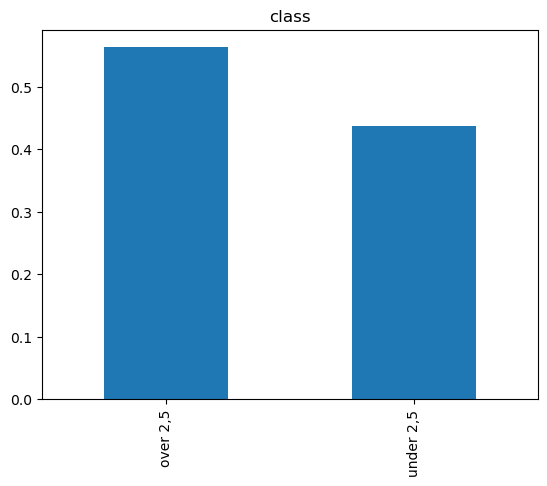

In [7]:
plt.figure()
labels_name = ['under 2,5', 'over 2,5']
df['class'] = pd.cut(x=df['global'], bins=[min(df['global']), 2, max(df['global'])],
              labels=labels_name, include_lowest=True)
df['class'].value_counts(normalize=True).plot.bar()
plt.title('class')


In [8]:
df.columns

Index(['journée', 'home_team', 'away_team', 'total_home_team_goal',
       'total_away_team_goal', 'global', 'class'],
      dtype='object')

In [9]:
dico = {'total_home_team_goal': 'home_team_scored',
        'total_away_team_goal': 'home_team_conceded'}
df.rename(columns=dico, inplace=True)
df['away_team_scored'] = df['home_team_conceded']
df['away_team_conceded'] = df['home_team_scored']
df.columns

Index(['journée', 'home_team', 'away_team', 'home_team_scored',
       'home_team_conceded', 'global', 'class', 'away_team_scored',
       'away_team_conceded'],
      dtype='object')

### Visualisation des variables
* Crée une fonction *viz* qui prend pour argument le nom de l'équipe a observer
* crée deux sous-ensemble de données (domicile et extérieur)
* Observer pour chaque sous ensemble, la variable sélectionner

In [10]:
def viz_target(team):
    """_summary_

    Args:
        team (str): Nom de l'équipe à observer
    """
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
    sns.histplot(data=home, x=home['global'], kde=True, ax=axs[0], hue=home['class'], discrete=True)
    sns.histplot(data=away, x=away['global'], kde=True, ax=axs[1], hue=away['class'], discrete=True)
    axs[0].set_xlabel('global at home')
    axs[1].set_xlabel('global at away')
    plt.title(team)
    plt.show()

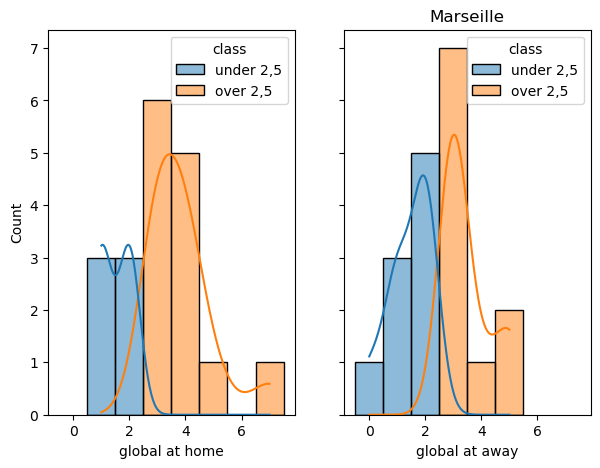

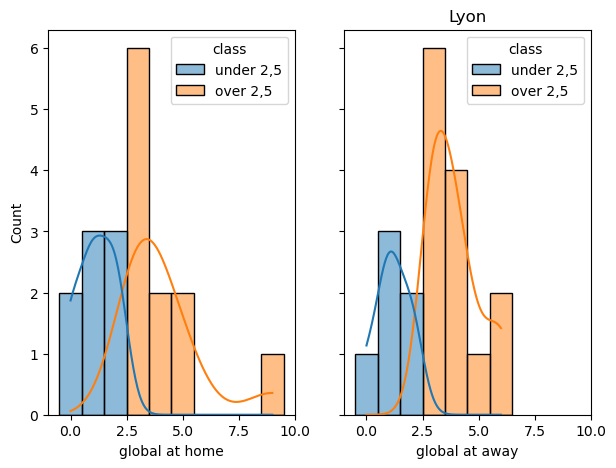

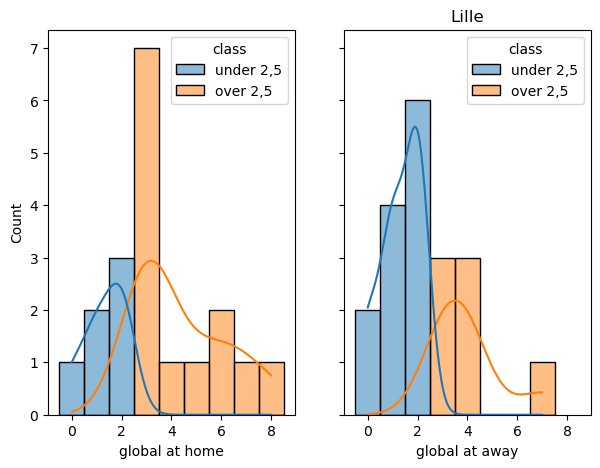

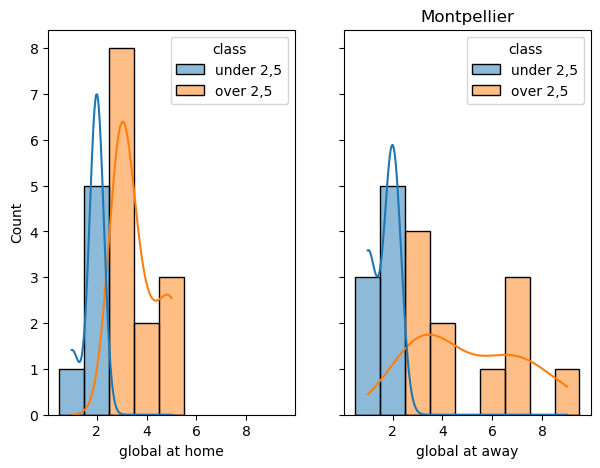

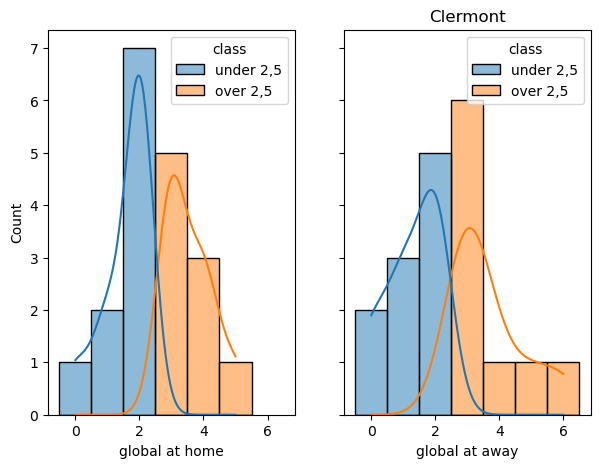

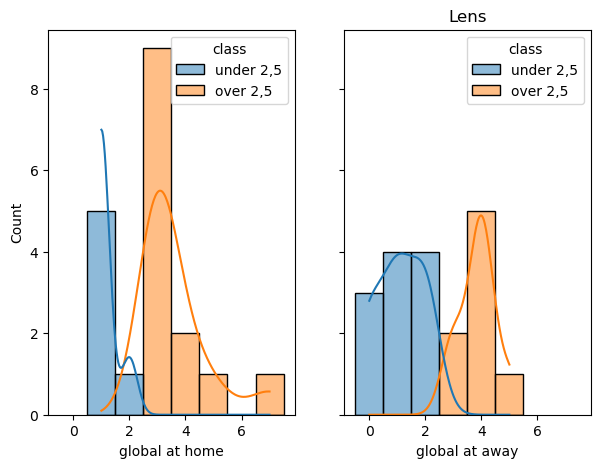

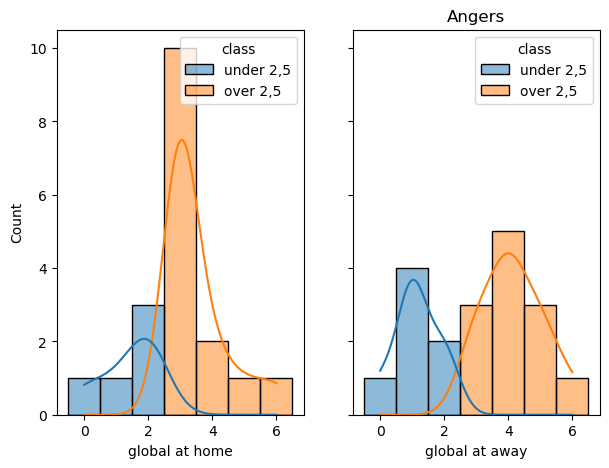

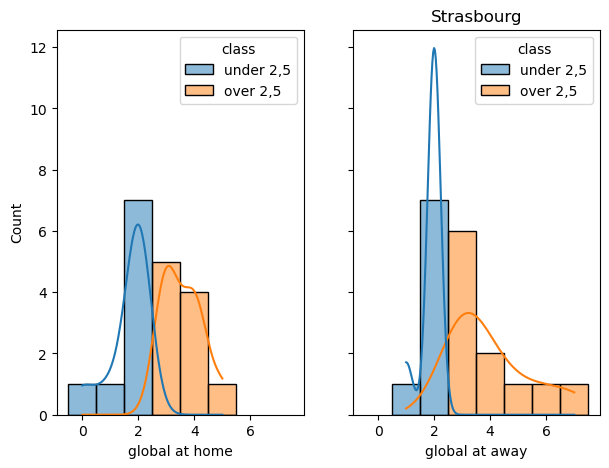

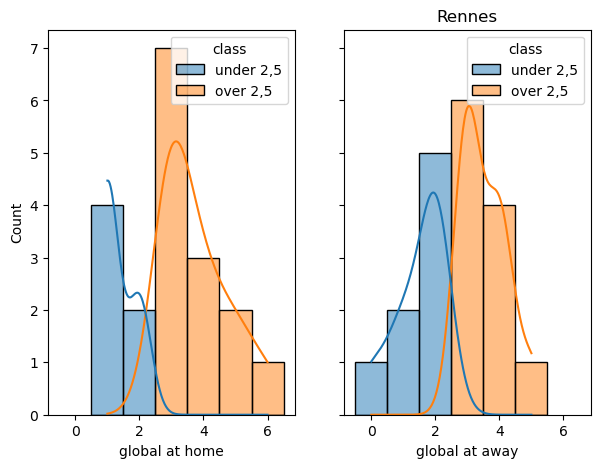

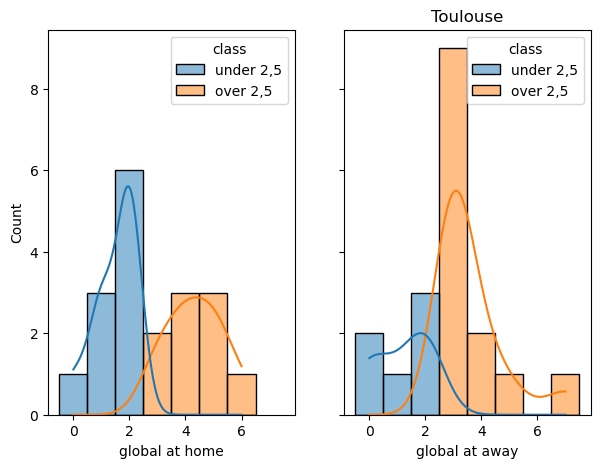

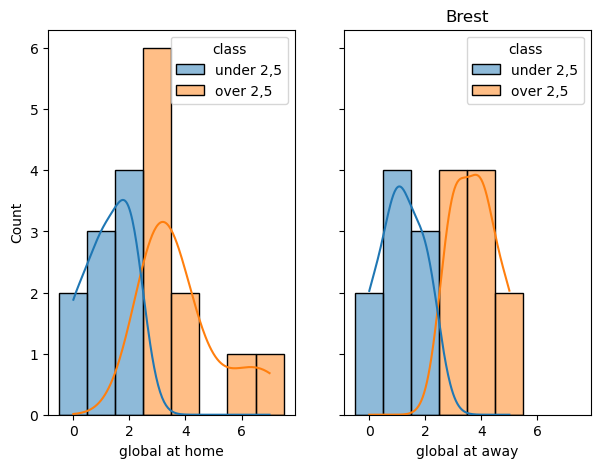

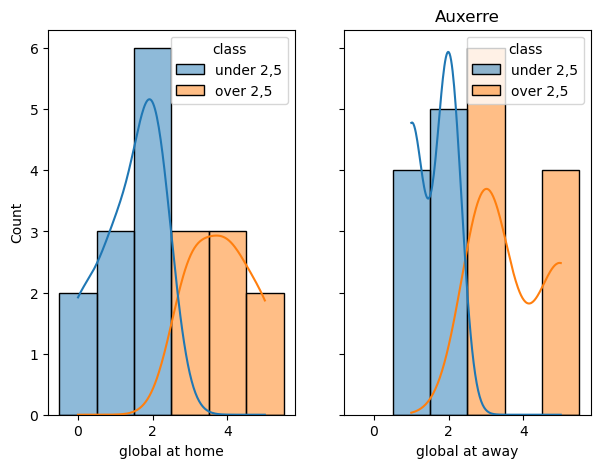

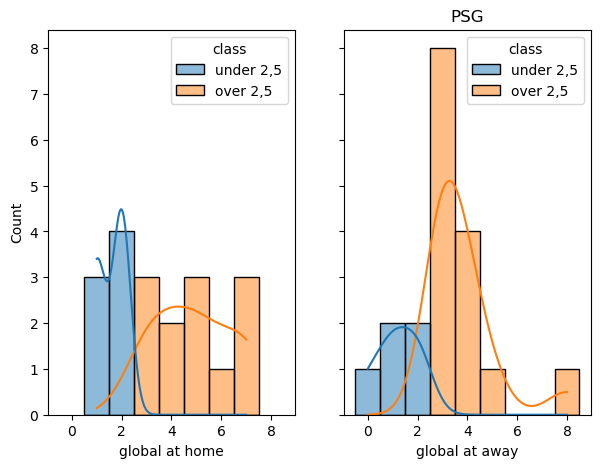

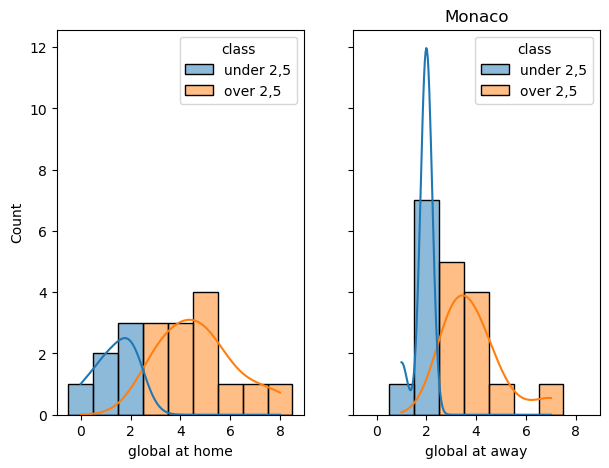

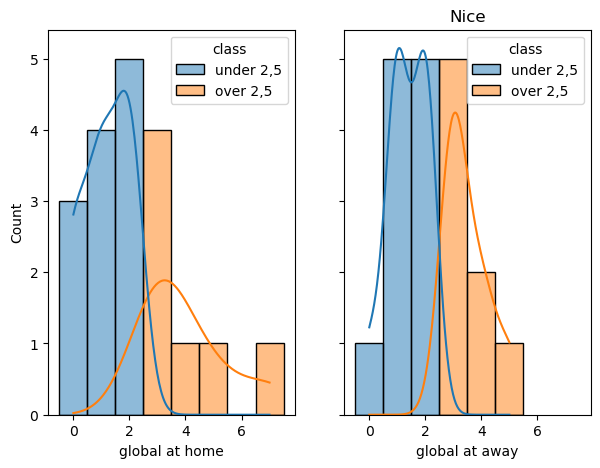

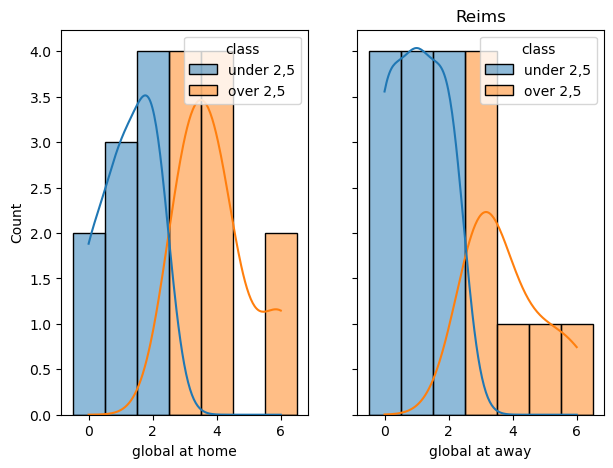

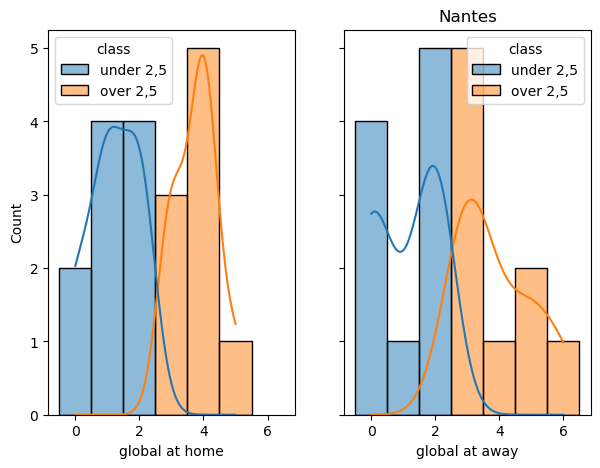

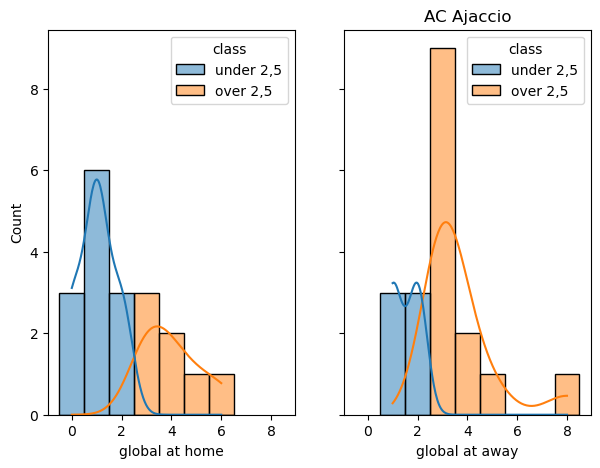

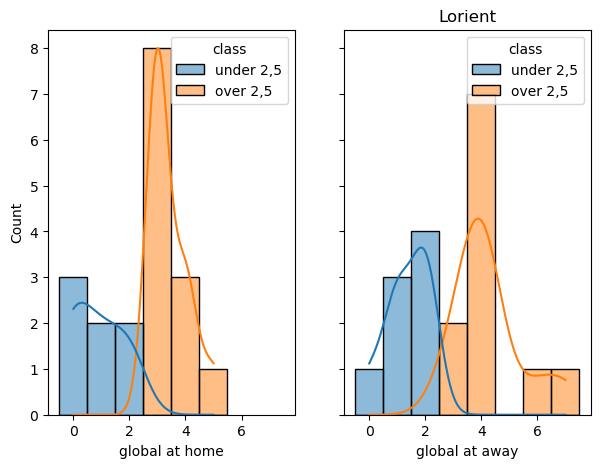

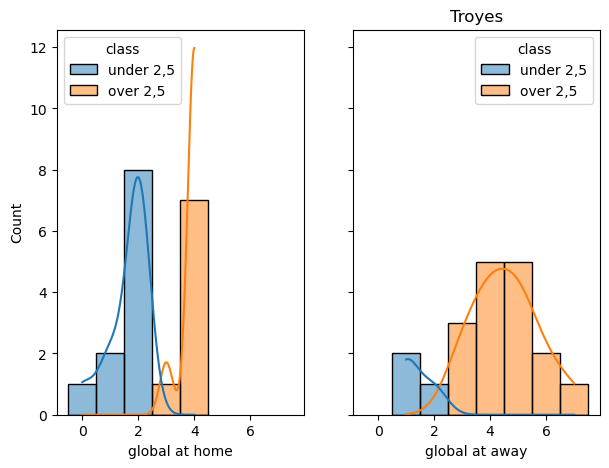

In [11]:
for team in df['away_team'].unique():
    viz_target(team)

In [12]:
def viz_feature(team, feature):
    """_summary_

    Args:
        team (str): Nom de l'équipe à étudier
        feature (str): Nom de la variable a visualiser
    """
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
    sns.histplot(data=home, x=home[f'home_team_{feature}'], kde=True, ax=axs[0], hue=home['class'], discrete=True)
    sns.histplot(data=away, x=away[f'away_team_{feature}'], kde=True, ax=axs[1], hue=away['class'], discrete=True)
    axs[0].set_xlabel(f'{feature} at home')
    axs[1].set_xlabel(f'{feature} at away')
    plt.title(team)
    plt.show()

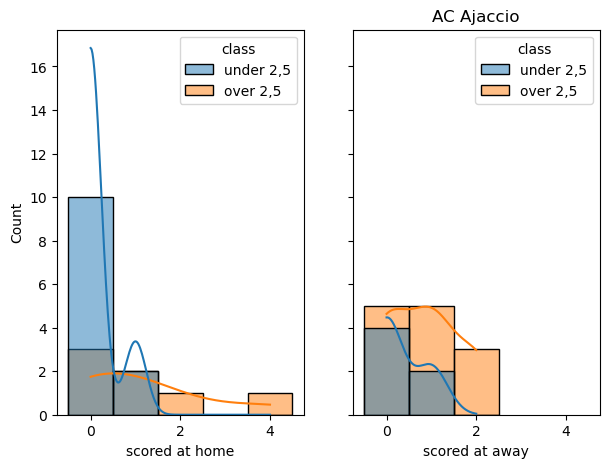

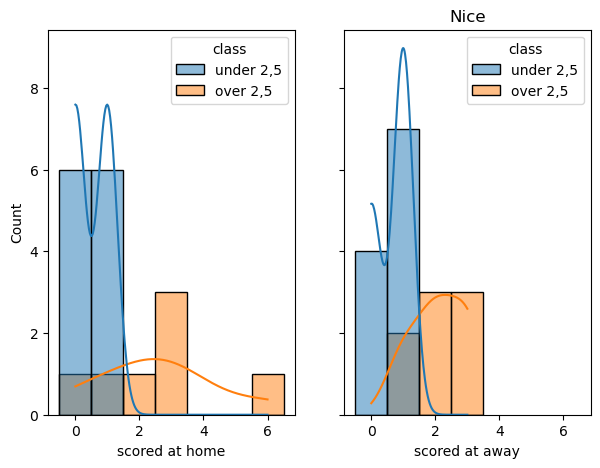

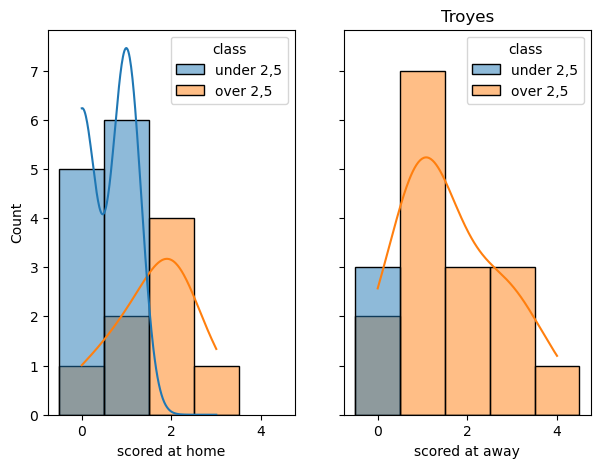

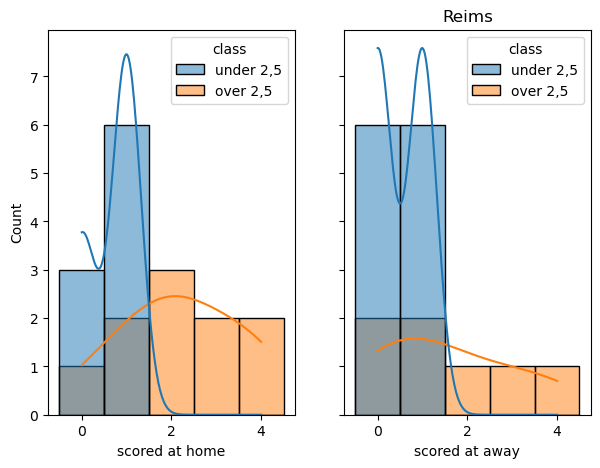

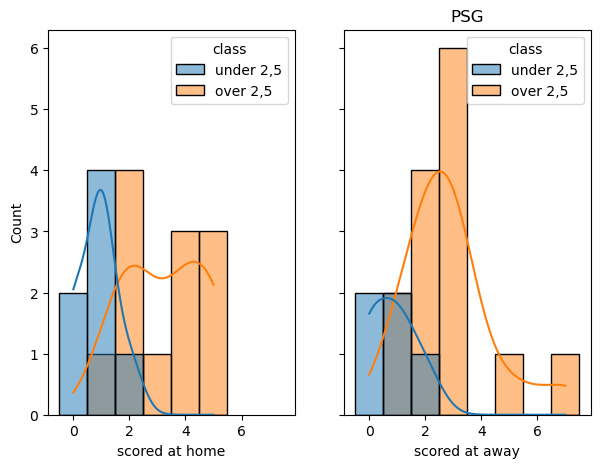

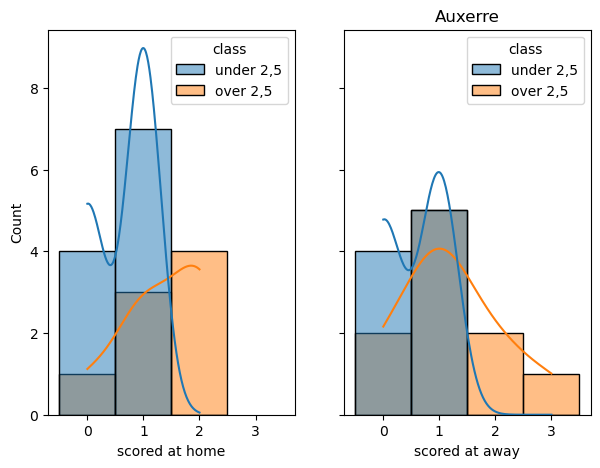

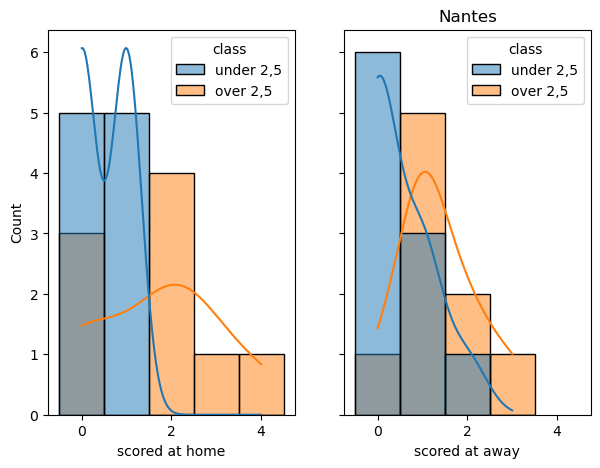

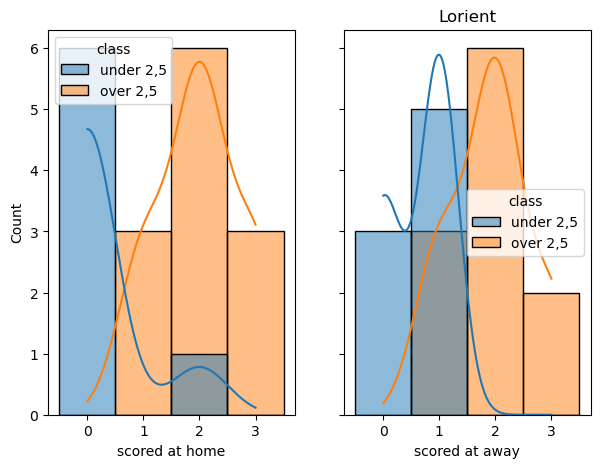

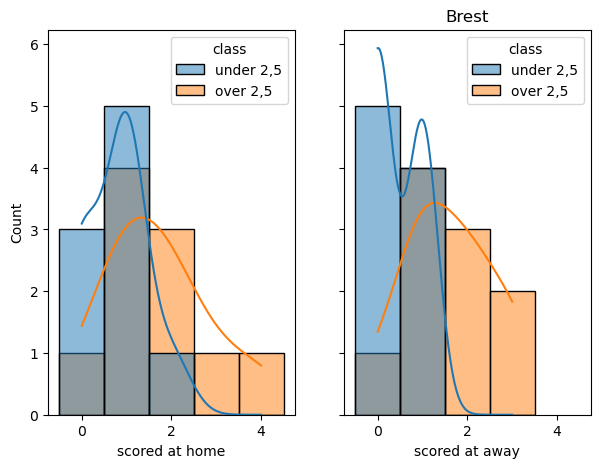

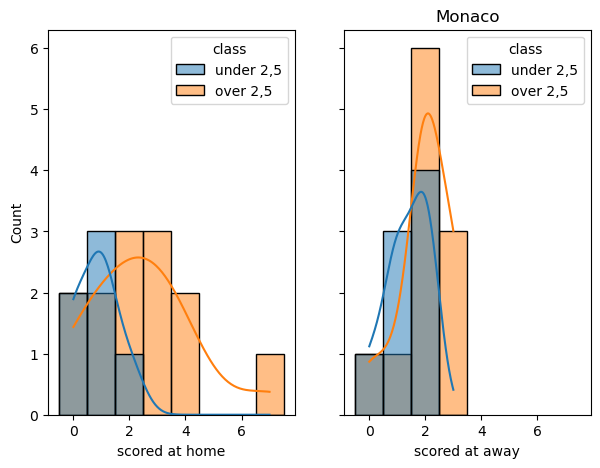

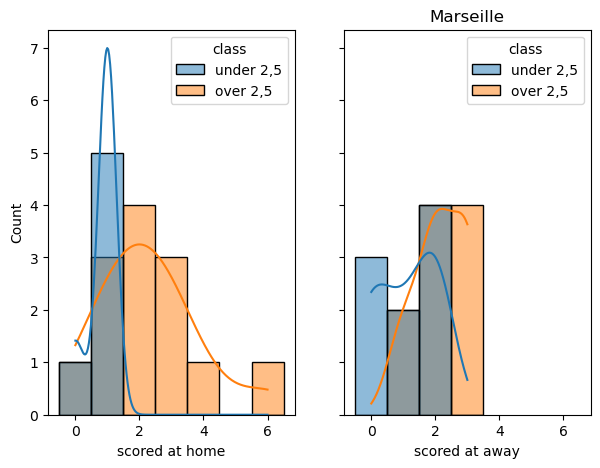

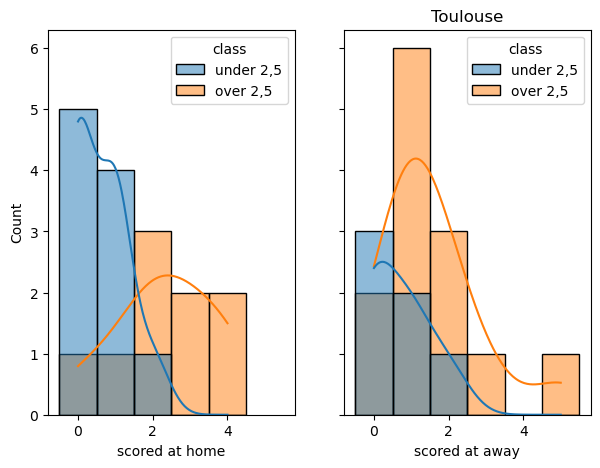

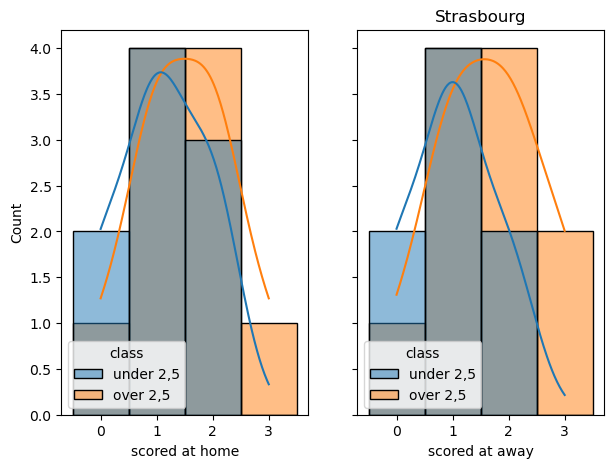

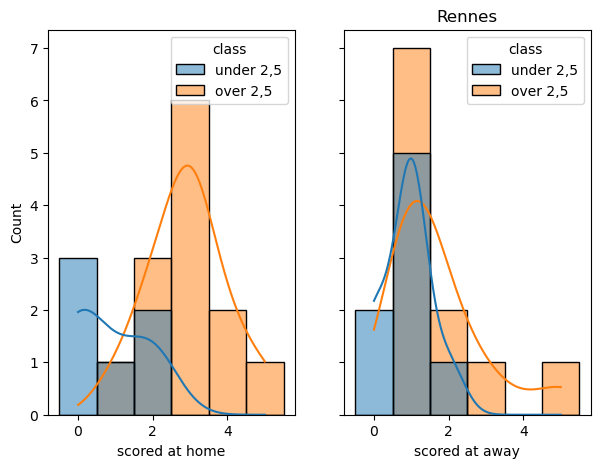

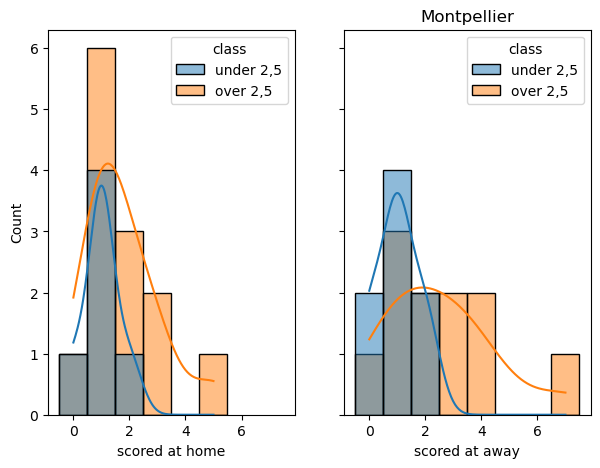

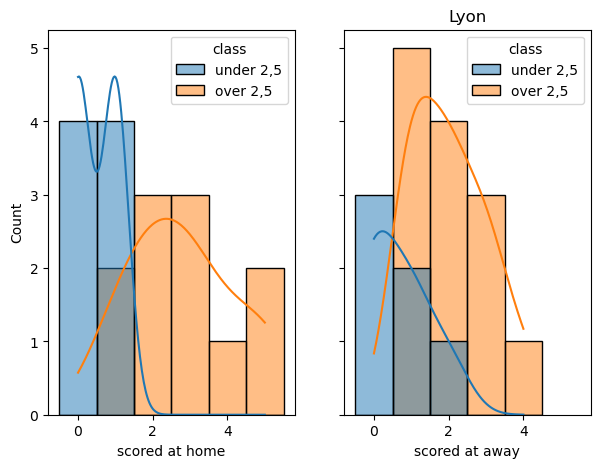

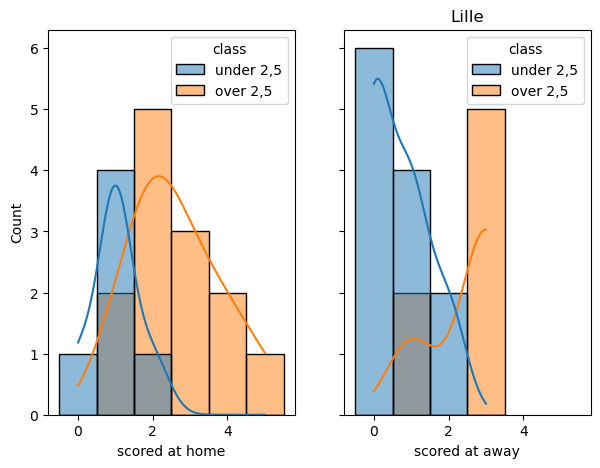

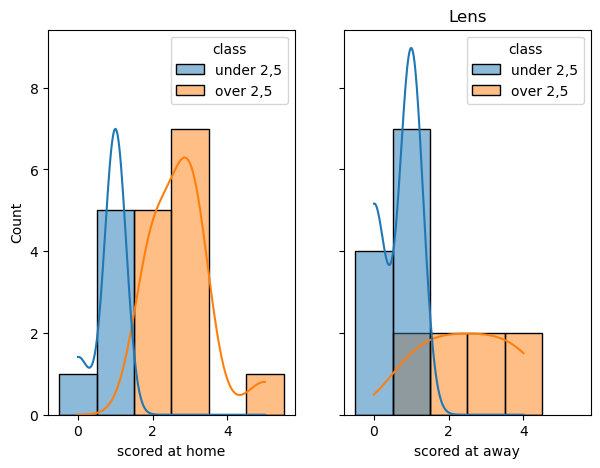

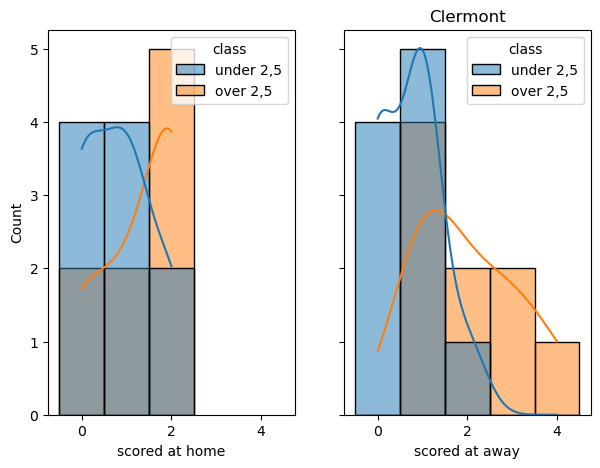

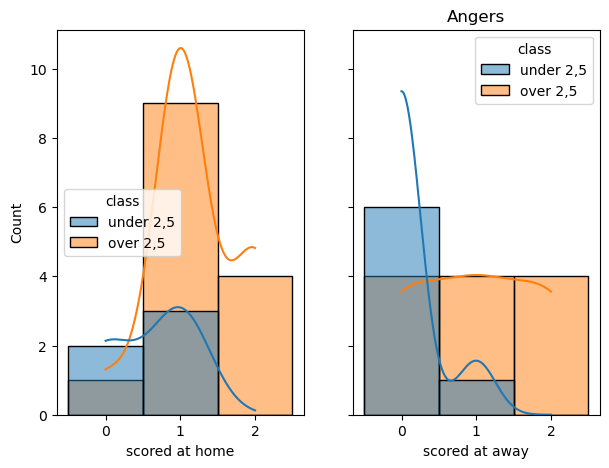

In [13]:
for team in df.home_team.unique():
    viz_feature(team, feature='scored')

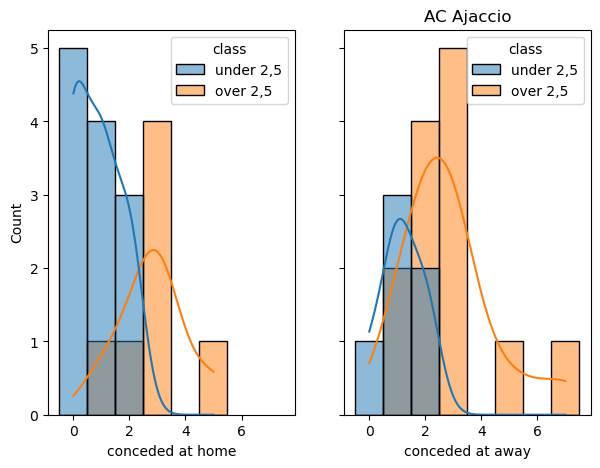

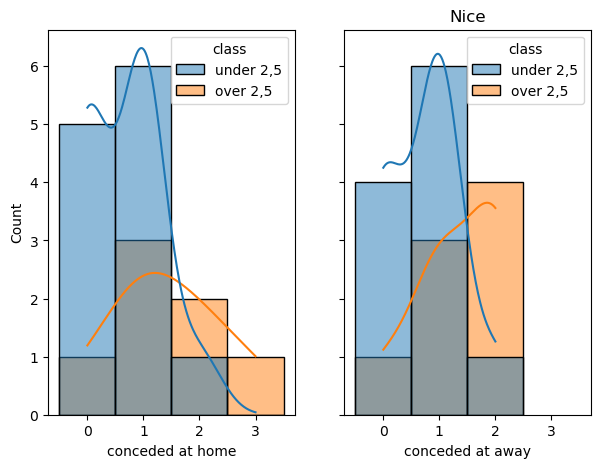

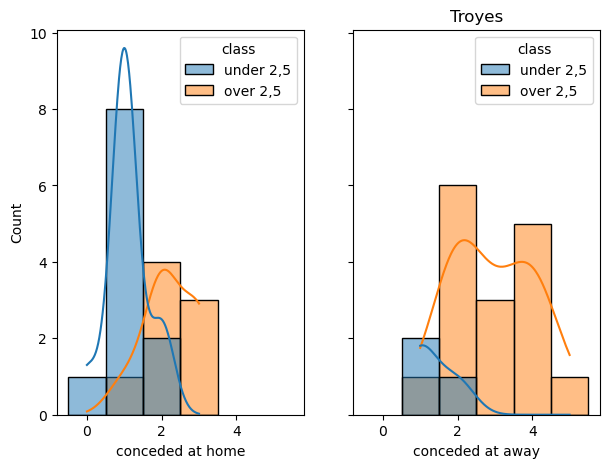

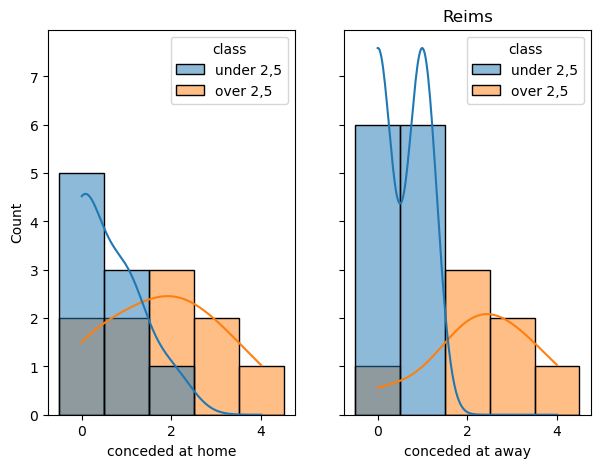

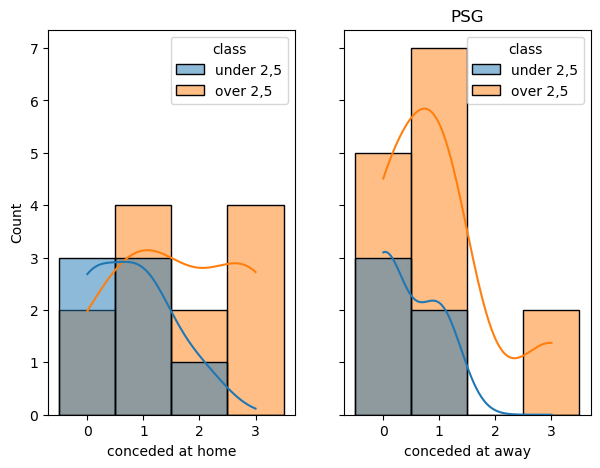

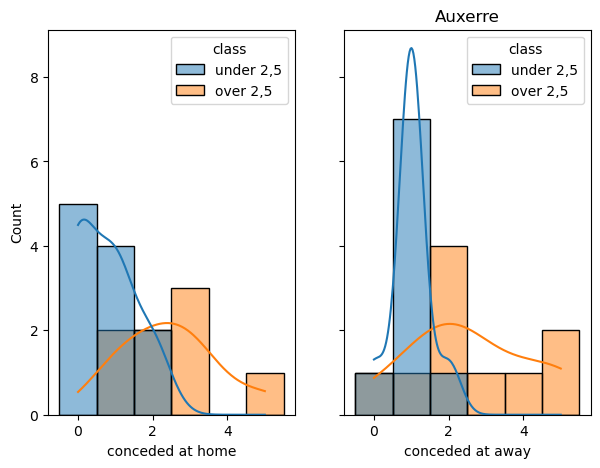

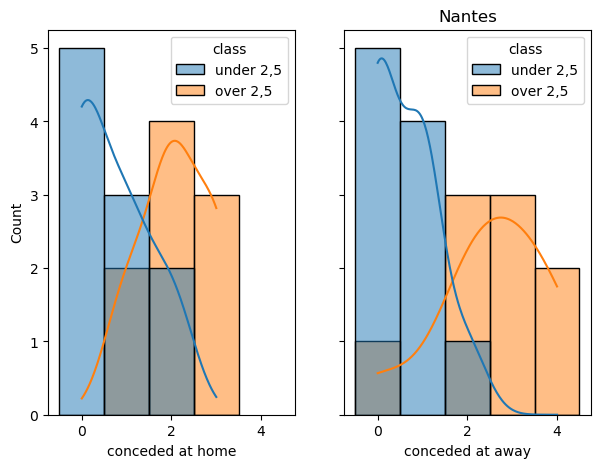

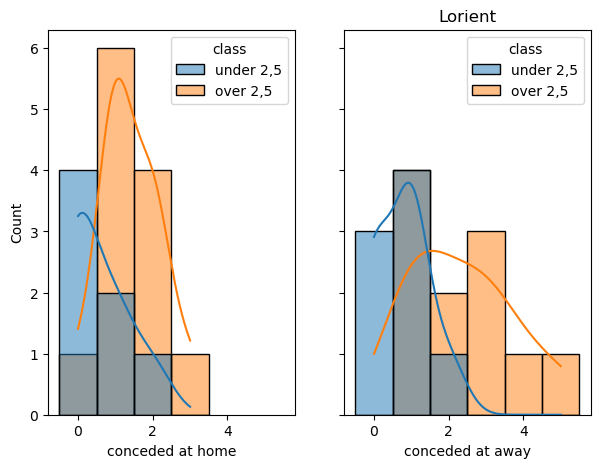

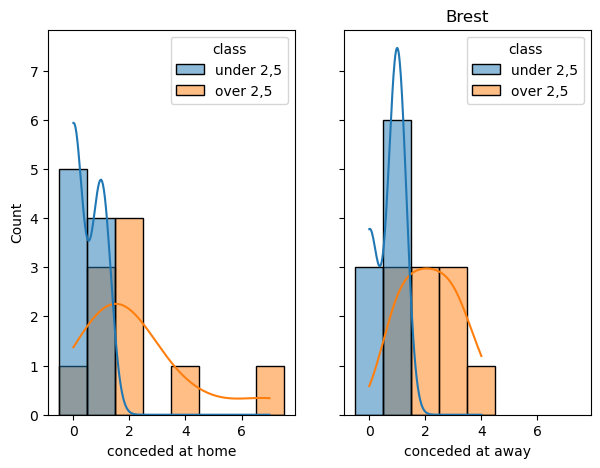

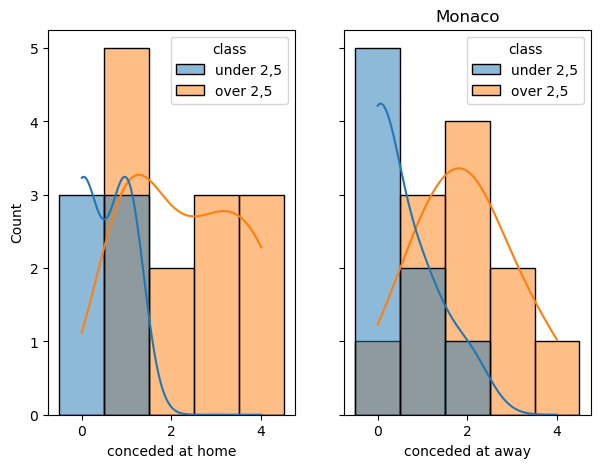

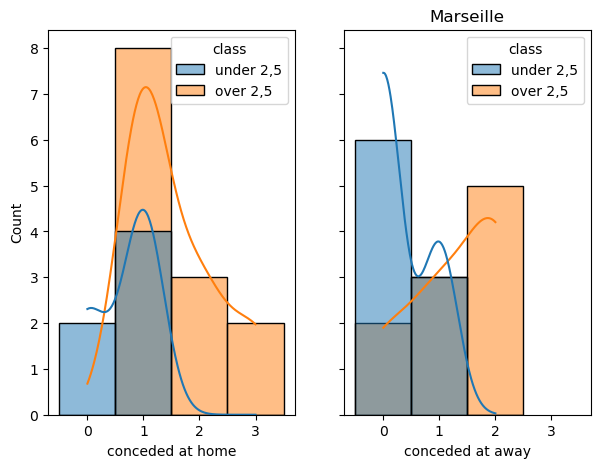

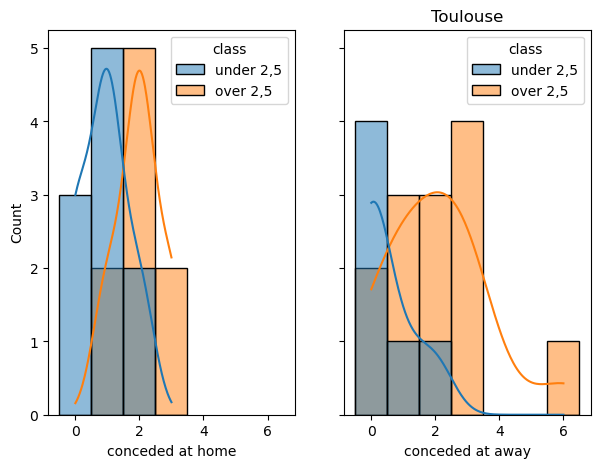

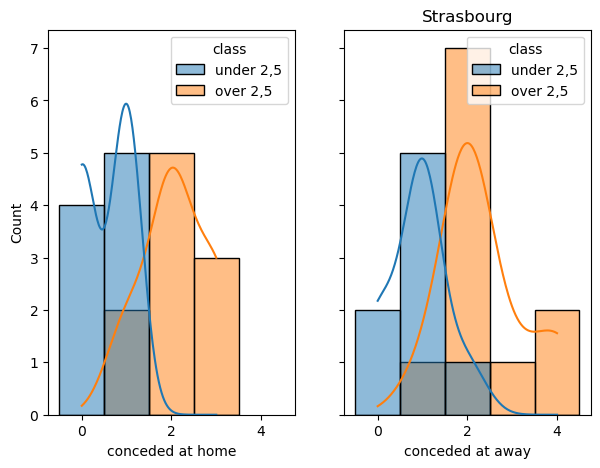

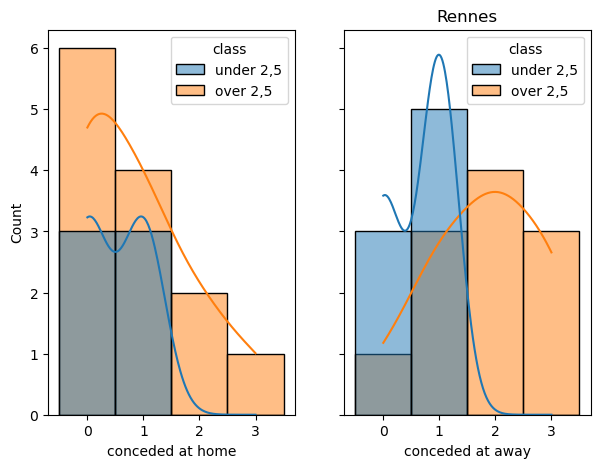

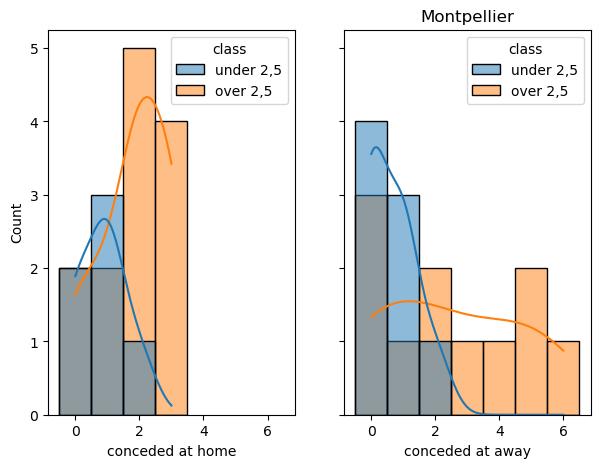

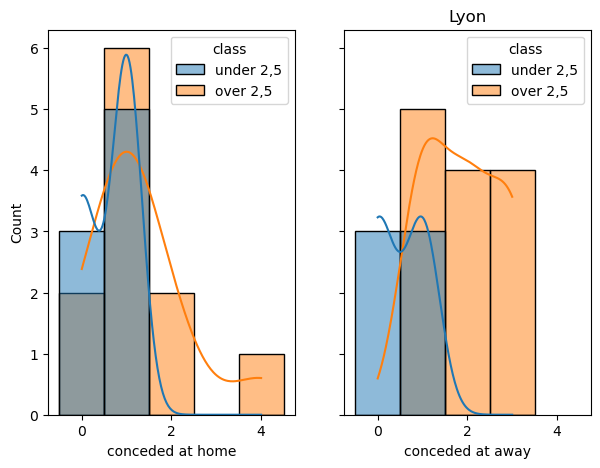

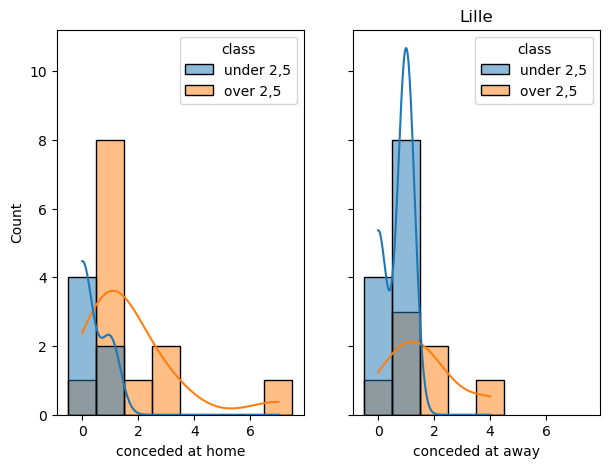

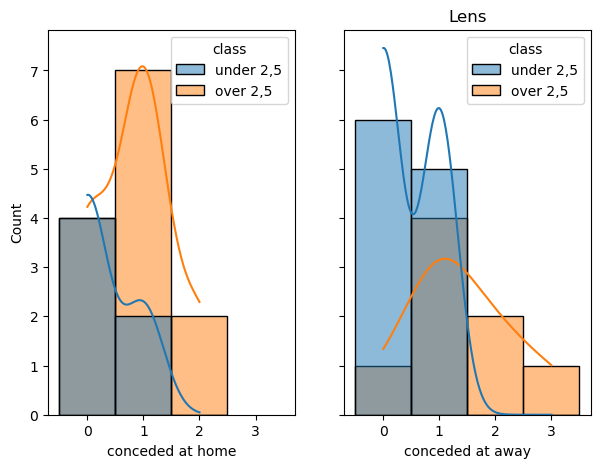

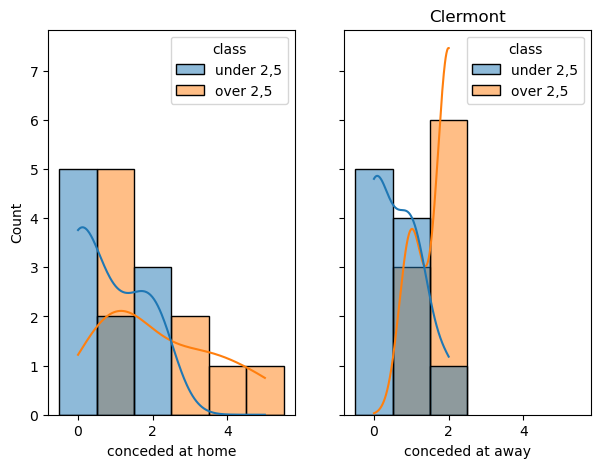

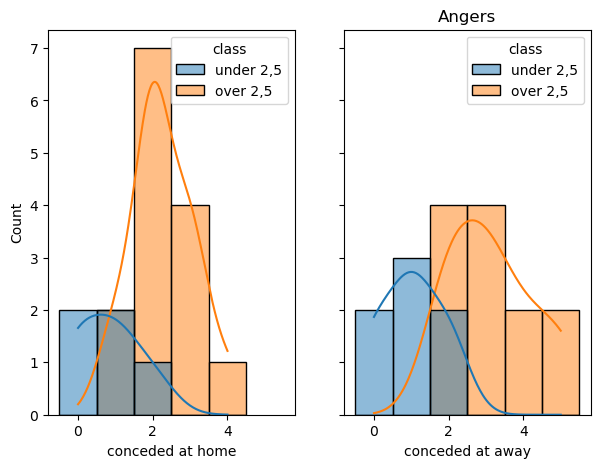

In [14]:
for team in df.home_team.unique():
    viz_feature(team, feature='conceded')

### Target / Feature relationship

In [15]:
df.columns

Index(['journée', 'home_team', 'away_team', 'home_team_scored',
       'home_team_conceded', 'global', 'class', 'away_team_scored',
       'away_team_conceded'],
      dtype='object')

In [16]:
def rel_feature(team, feature):
    """Observe la rélation entre la target et `feature`

    Args:
        team (str): Nom de l'équipe à étudier
        feature (str): Nom de la variable a visualiser
    """
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
    sns.scatterplot(data=home, x=home['global'], y=home[f'home_team_{feature}'], hue=home['class'],
                    ax=axs[0])
    axs[0].set_xlabel('global at home')
    axs[0].set_ylabel(f'{feature} at home')
    sns.scatterplot(data=away, x=away['global'], y=away[f'away_team_{feature}'], hue=away['class'],
                    ax=axs[1])
    axs[1].set_xlabel('global at away')
    axs[1].set_ylabel(f'{feature} at away')
    plt.title(team)
    plt.suptitle(f'Target / {feature} relationship')
    plt.show()

#### [ Target | Scored ]

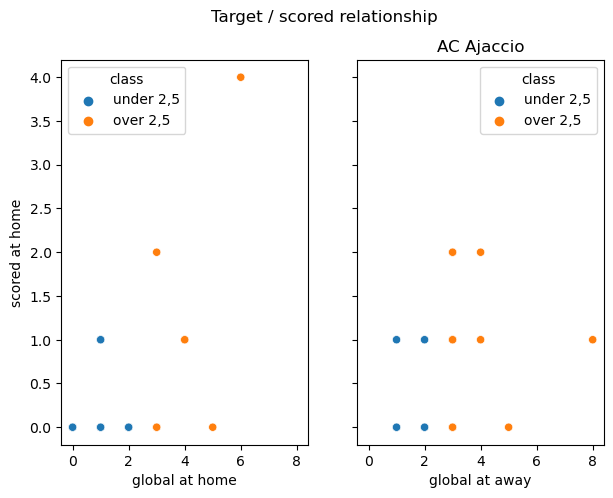

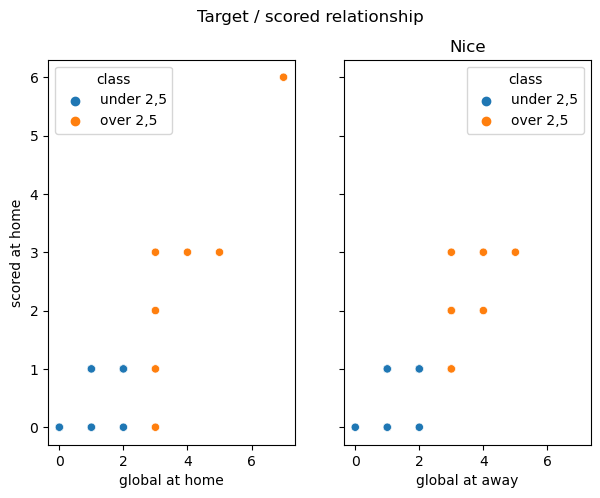

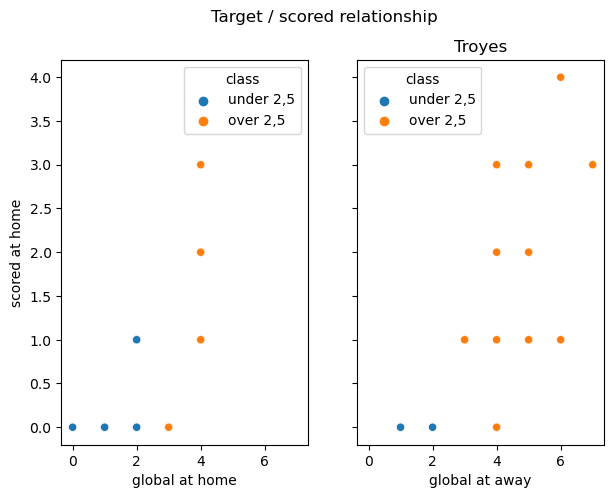

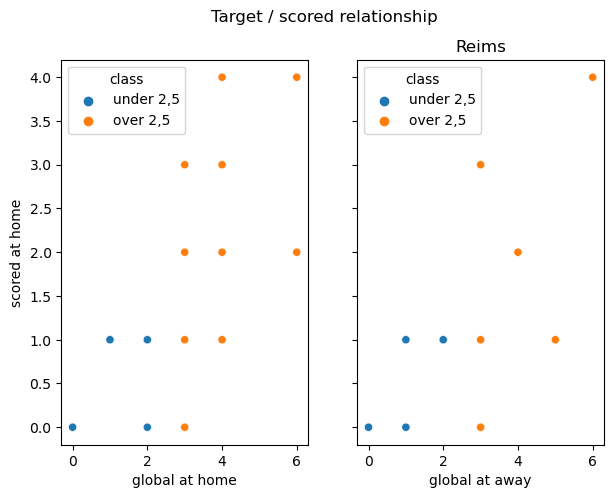

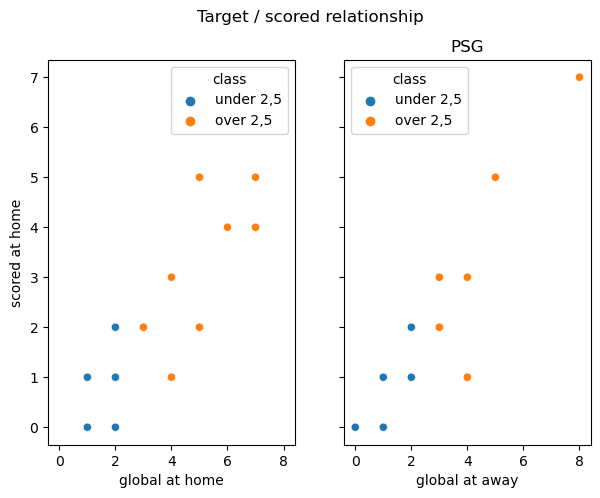

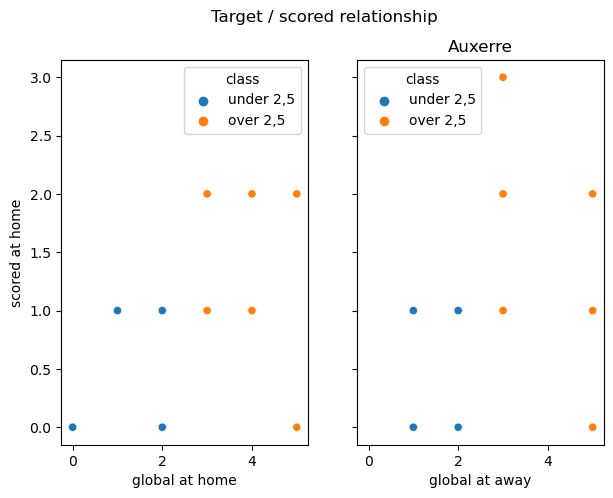

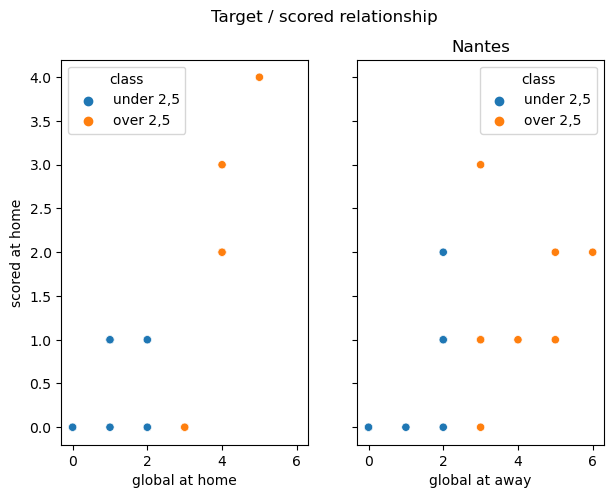

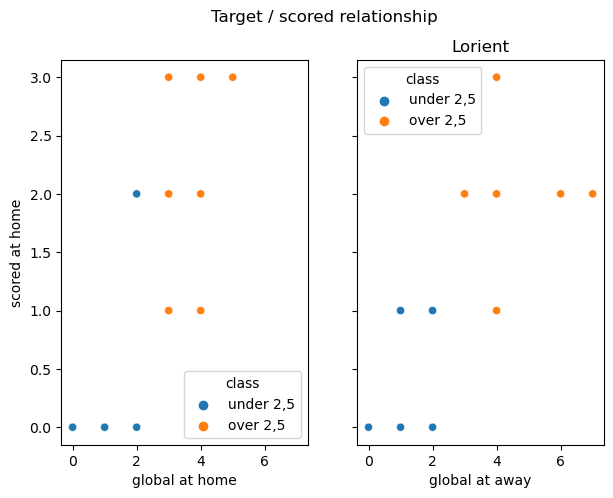

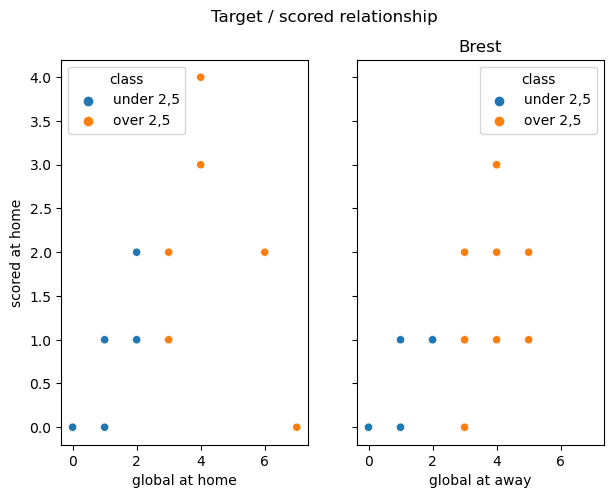

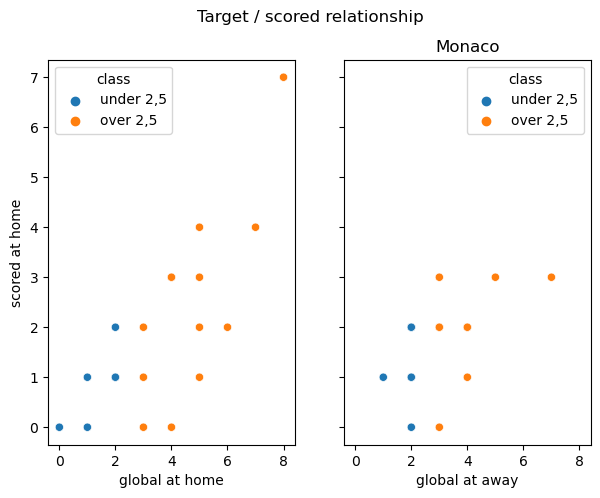

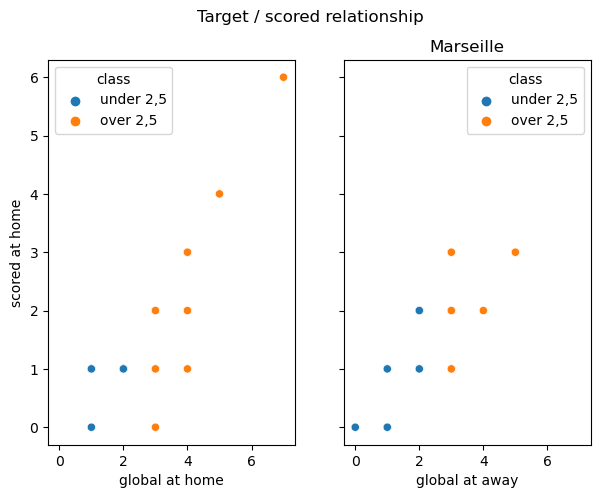

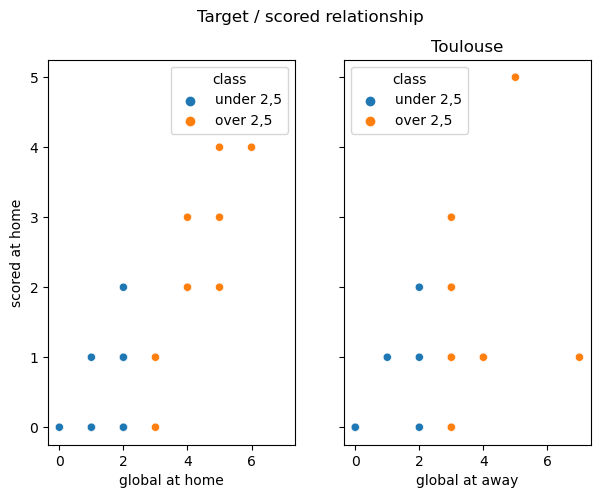

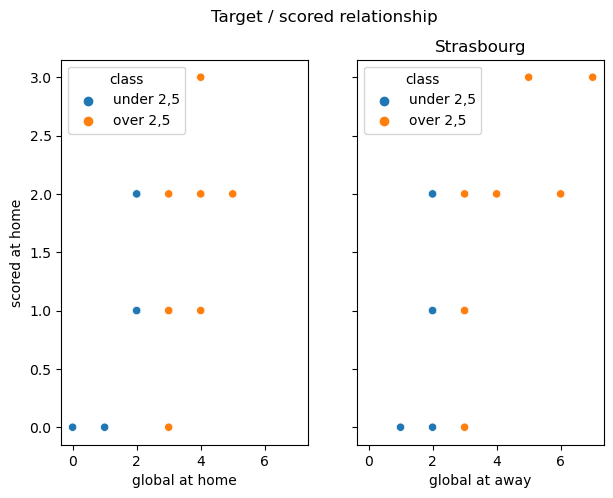

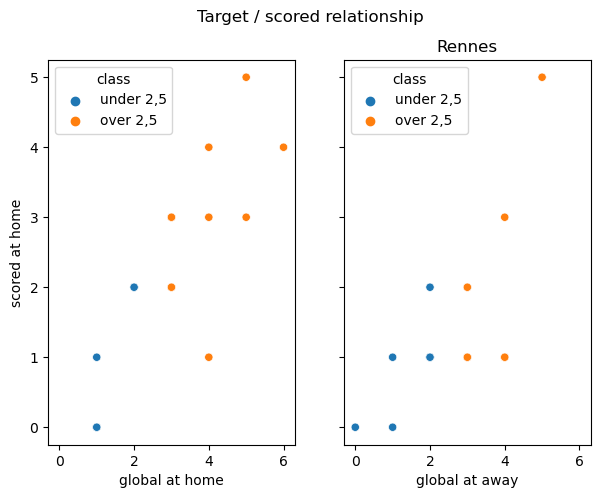

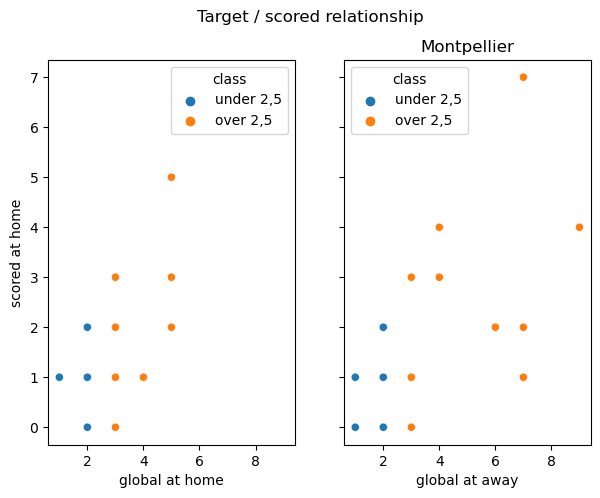

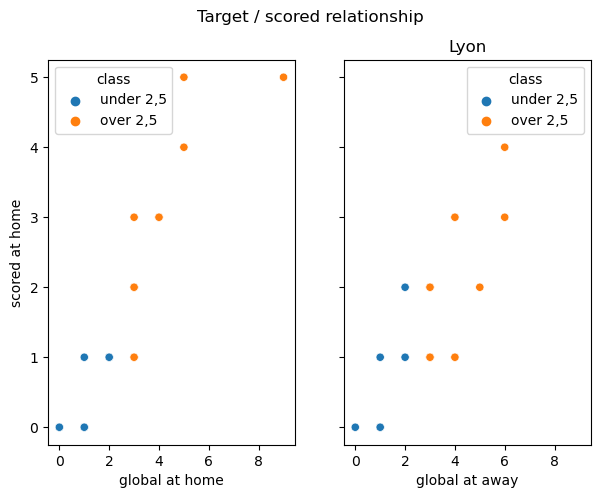

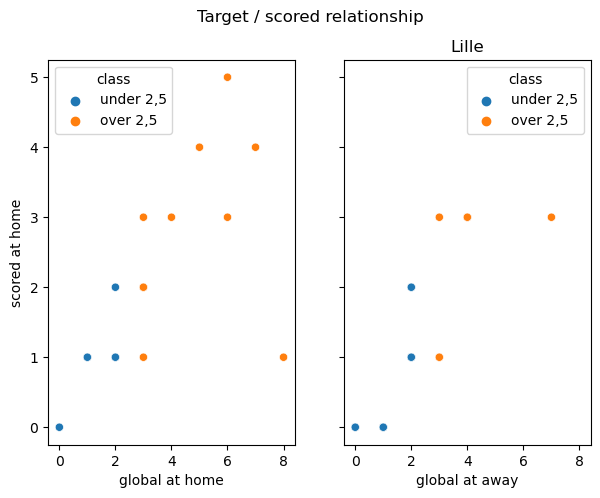

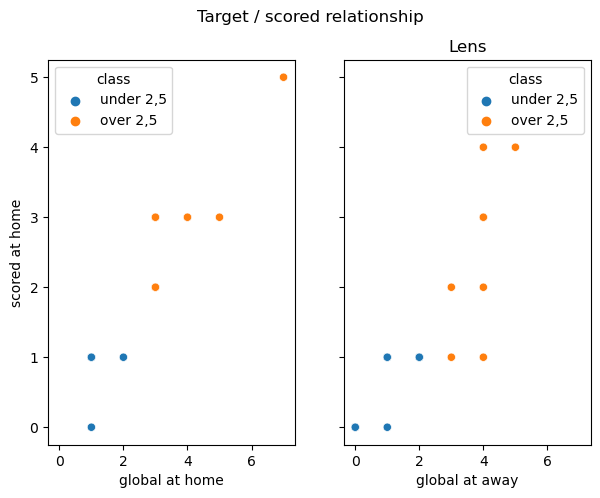

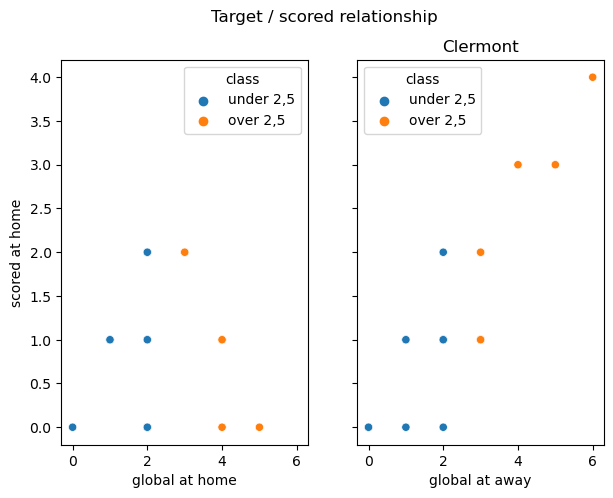

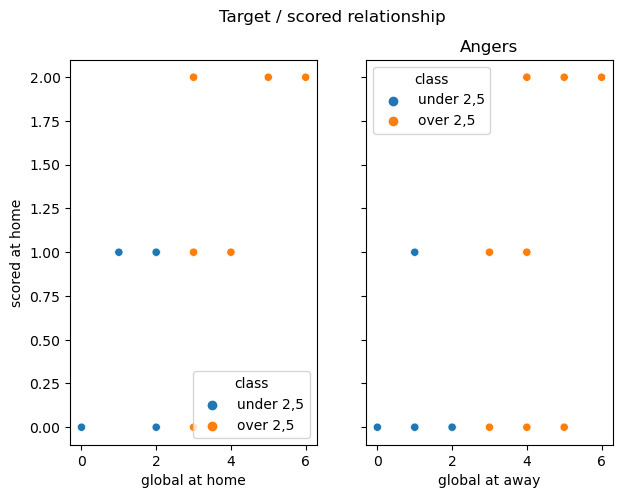

In [17]:
for team in df.home_team.unique():
    rel_feature(team, feature='scored')

#### [ Target | Conceded ]

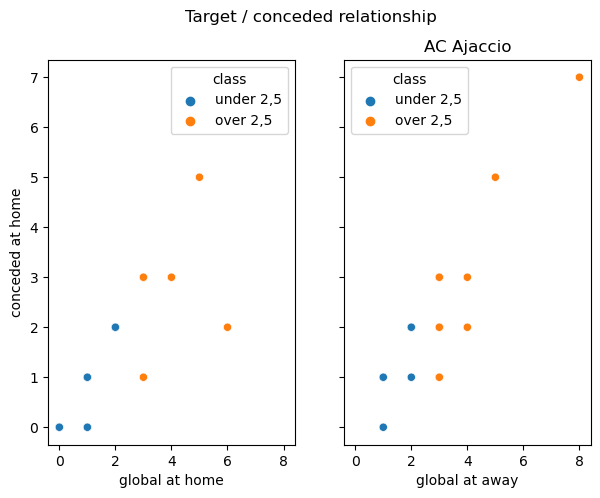

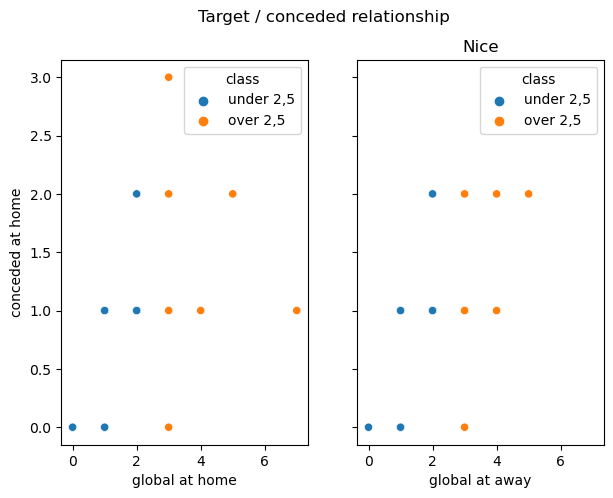

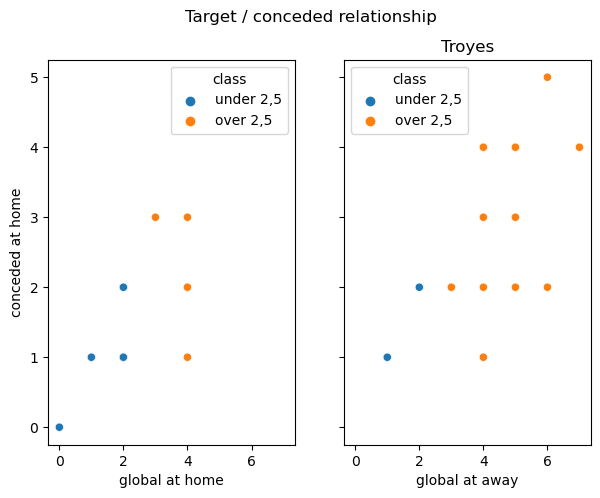

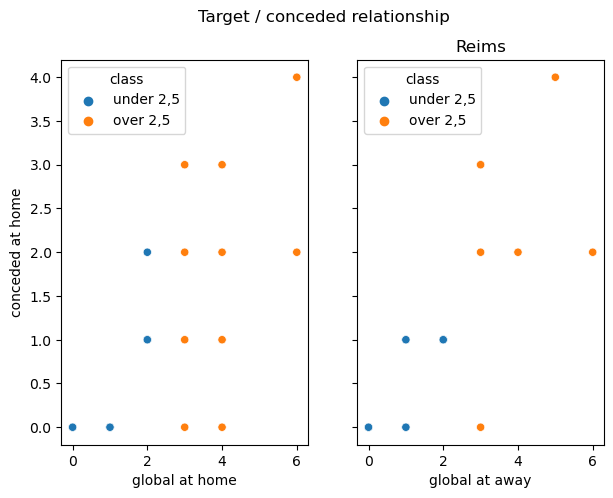

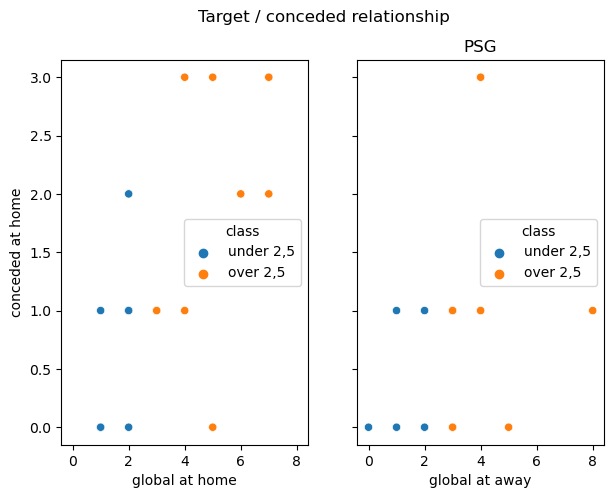

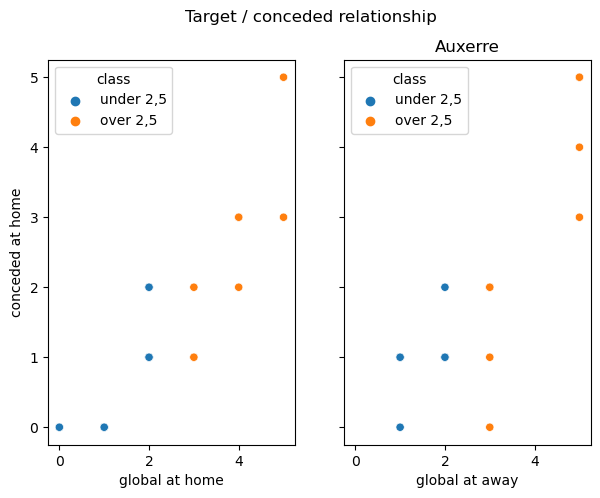

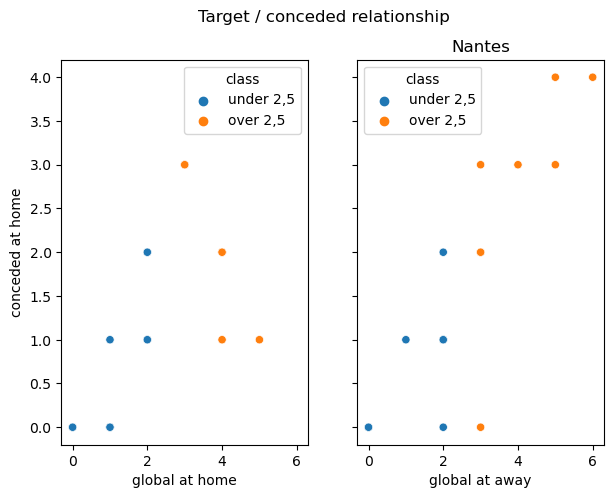

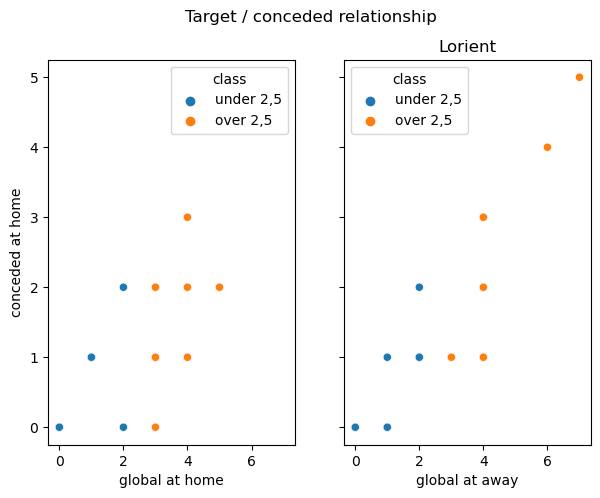

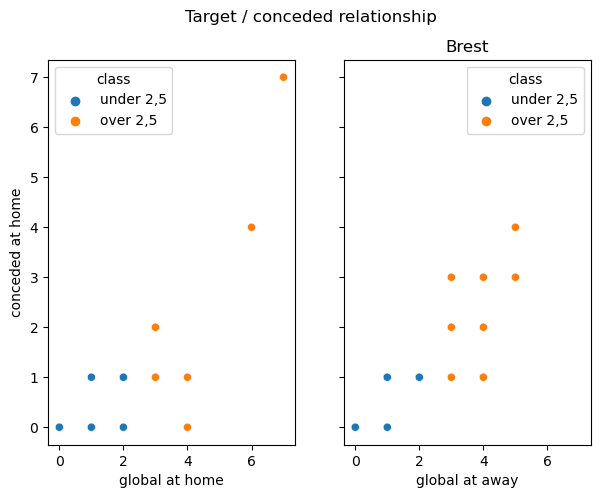

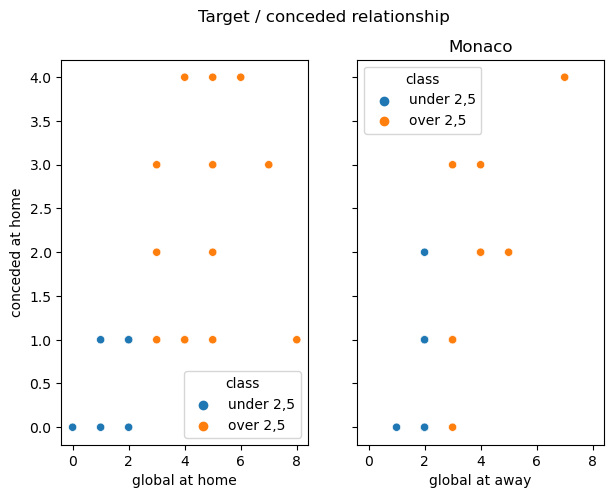

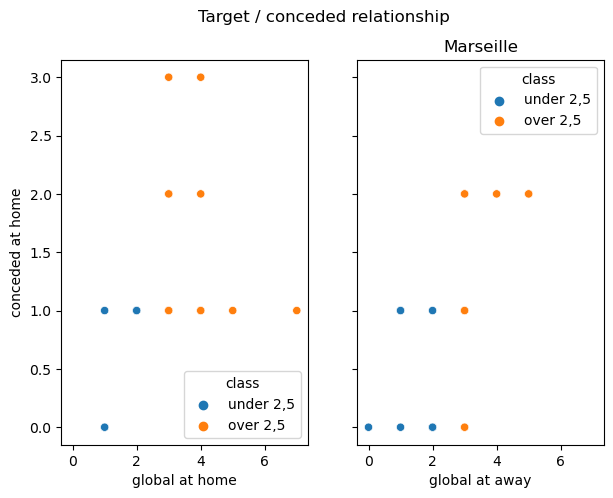

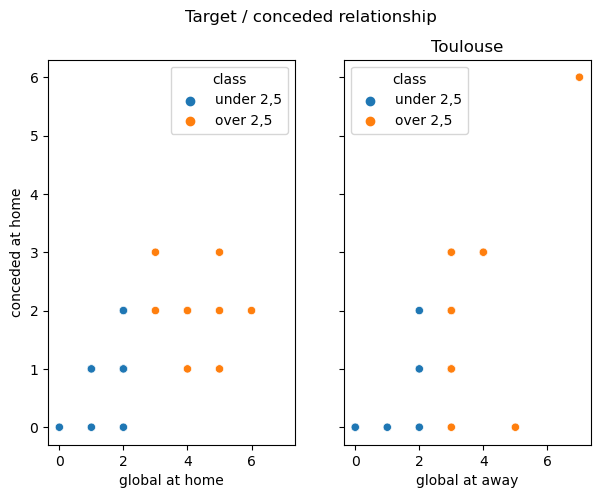

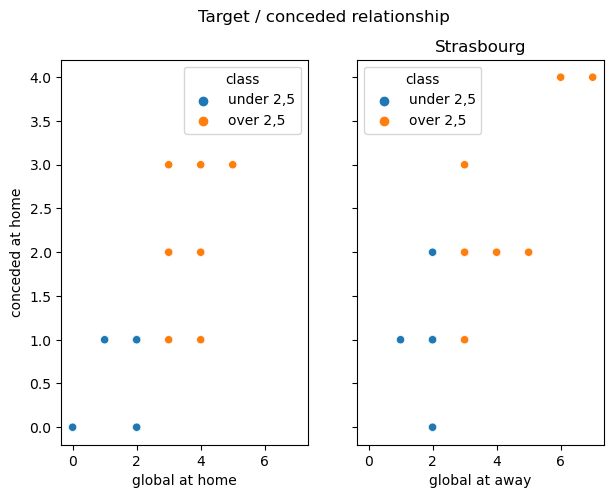

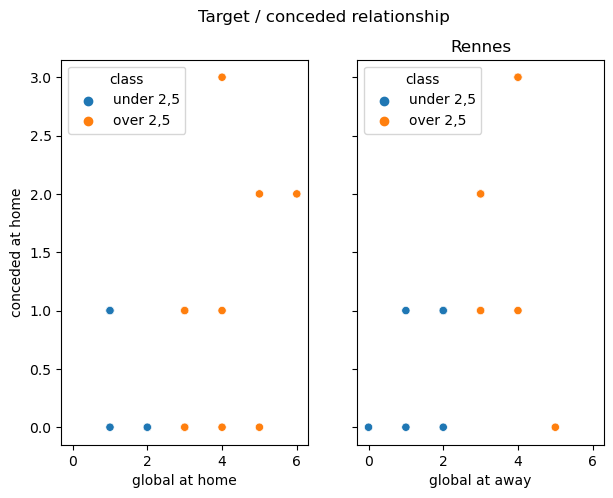

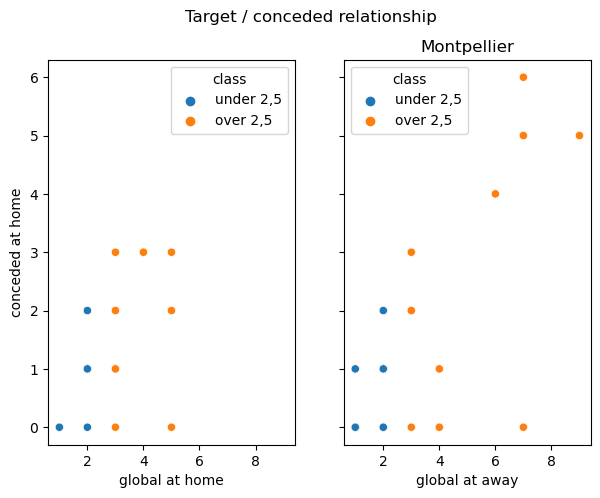

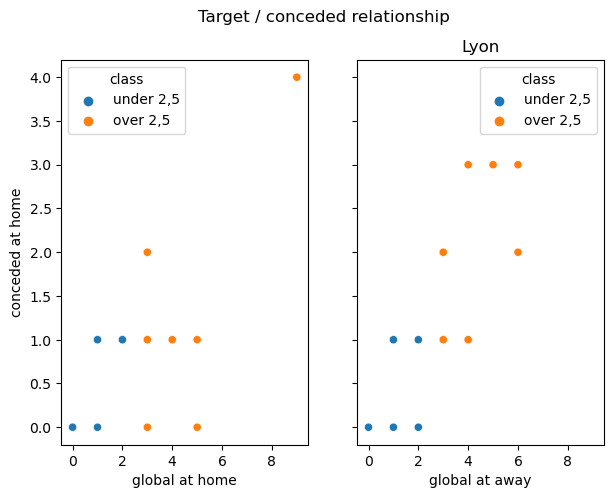

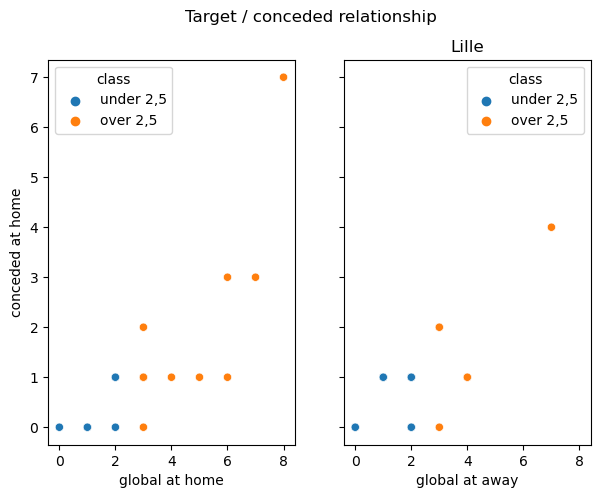

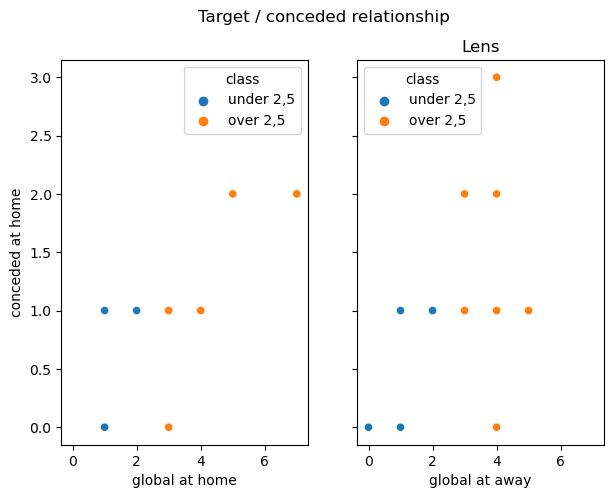

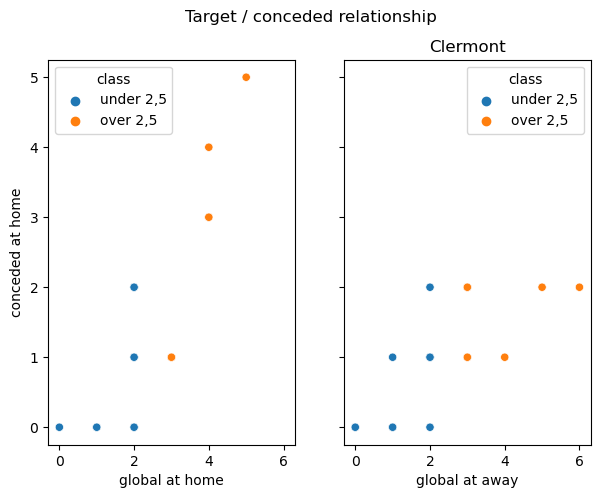

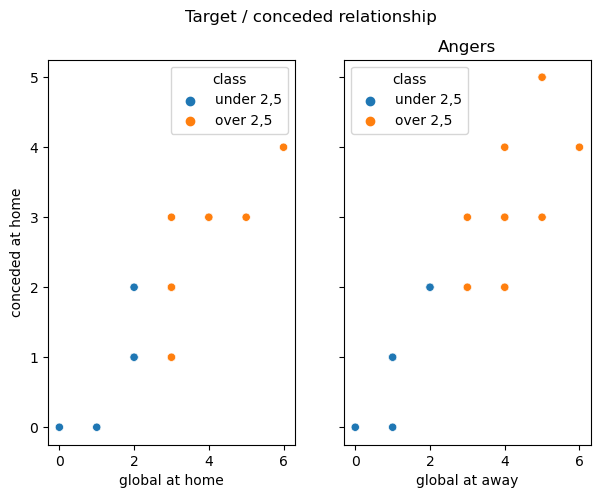

In [18]:
for team in df.home_team.unique():
    rel_feature(team, feature='conceded')

## Feature / Feature Relationship
### [lScored / Conceded ]

In [19]:
def rel_ff(team):
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(7,5))
    sns.scatterplot(data=home, x=home['home_team_scored'], y=home['home_team_conceded'], ax=axs[0],
                    hue=home['class'])
    axs[0].set_xlabel('scored at home')
    axs[0].set_ylabel('conceded at home')
    sns.scatterplot(data=away, x=away['away_team_scored'], y=away['away_team_conceded'], ax=axs[1],
                    hue=away['class'])
    axs[1].set_xlabel('scored at away')
    axs[1].set_ylabel('conceded at away')
    plt.suptitle(team)
    plt.show()

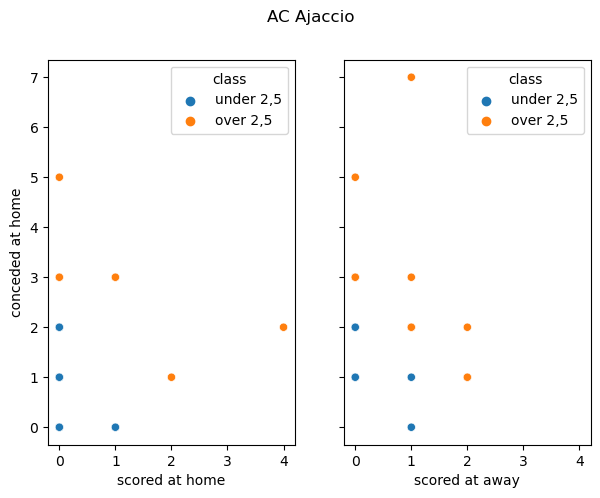

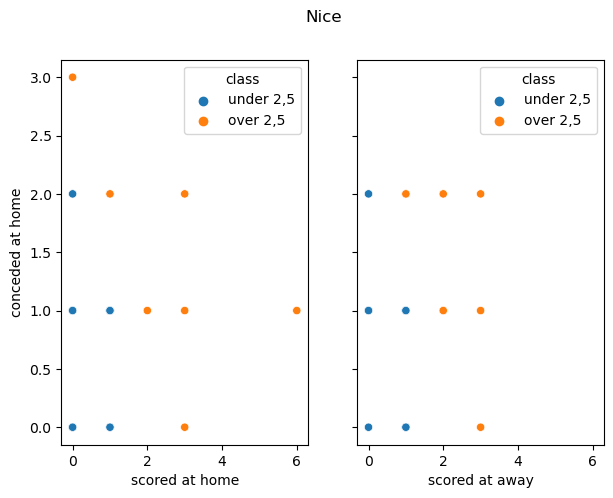

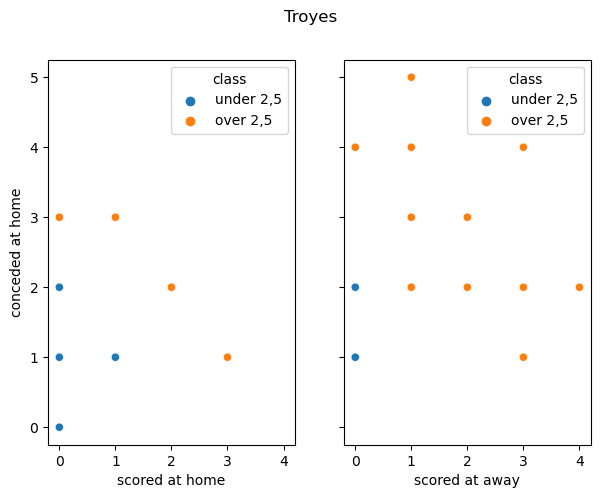

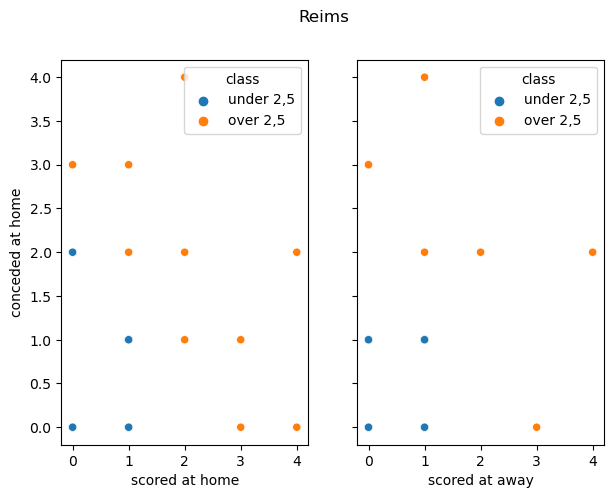

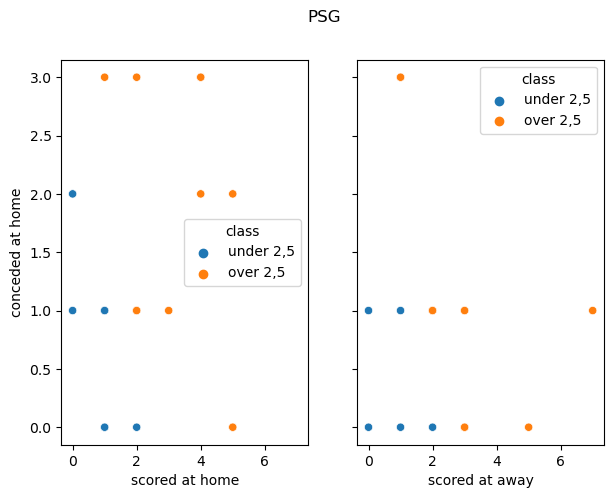

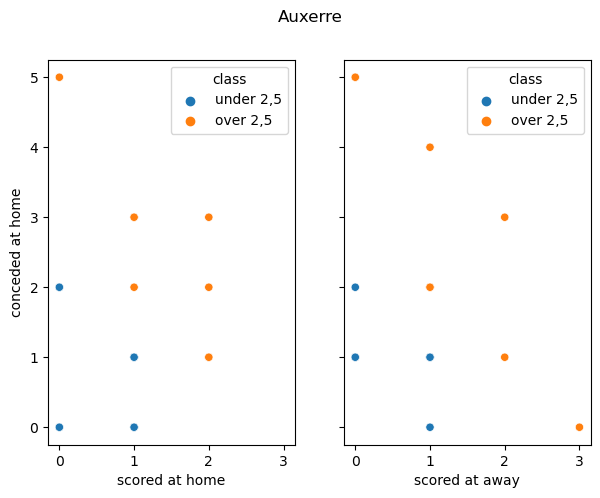

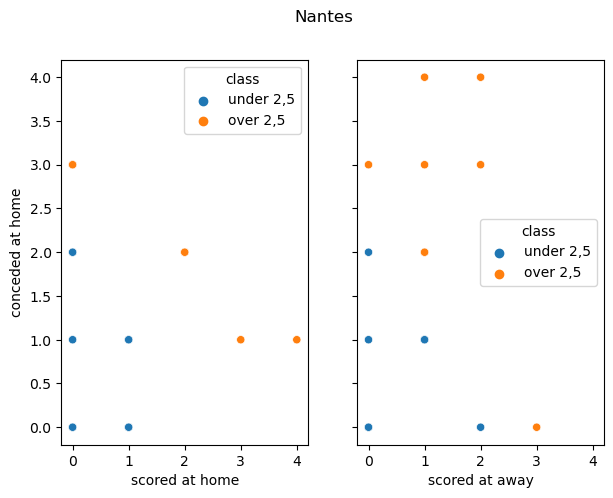

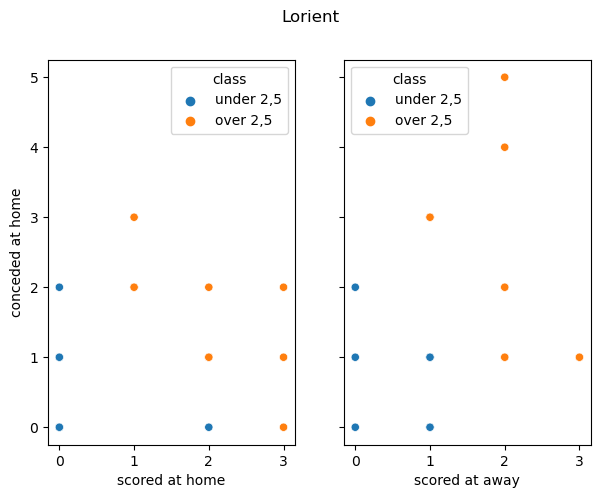

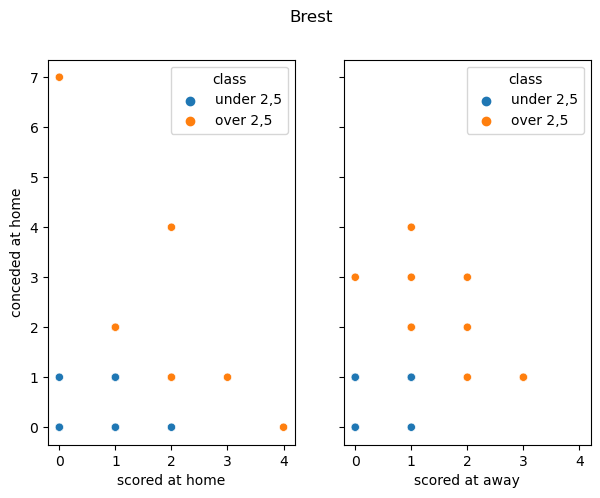

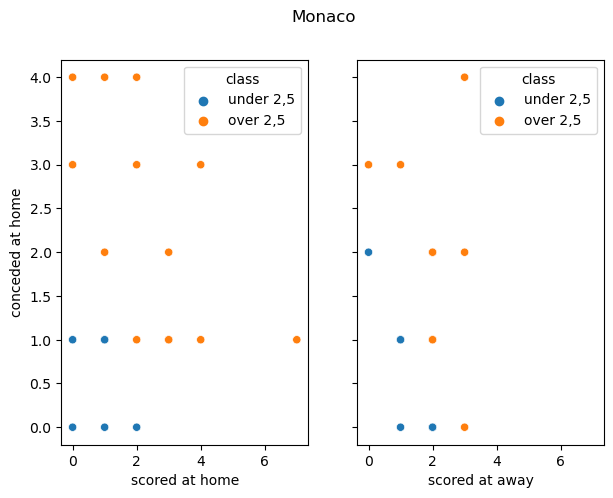

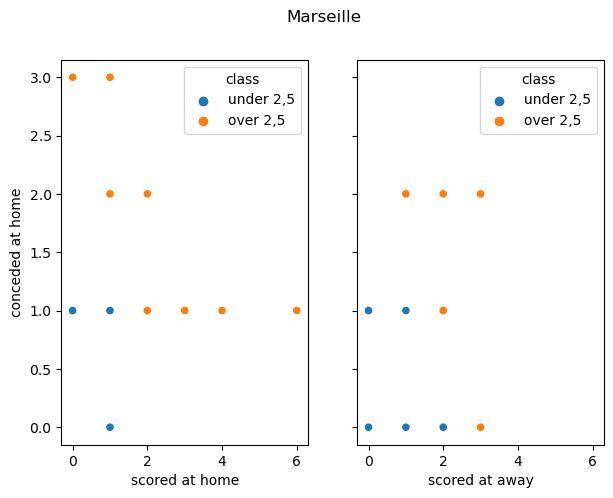

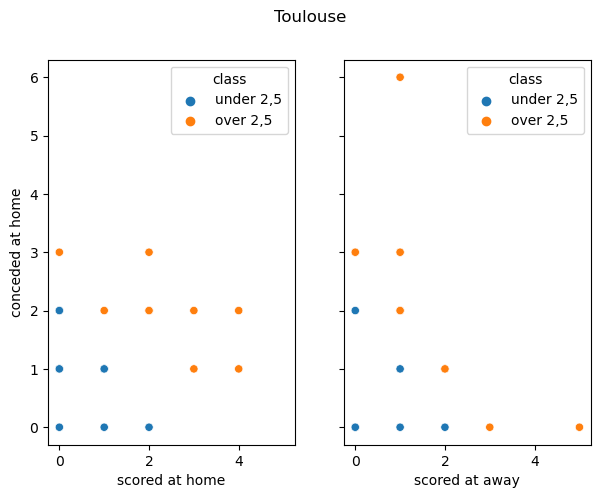

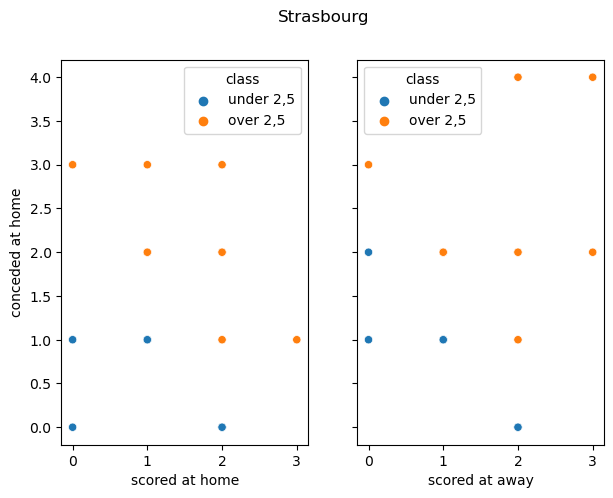

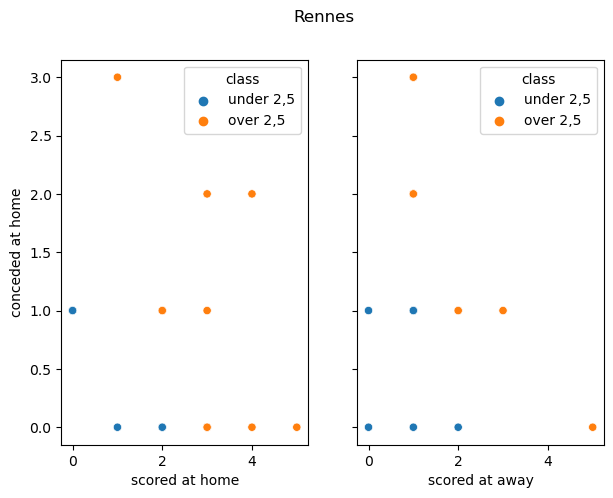

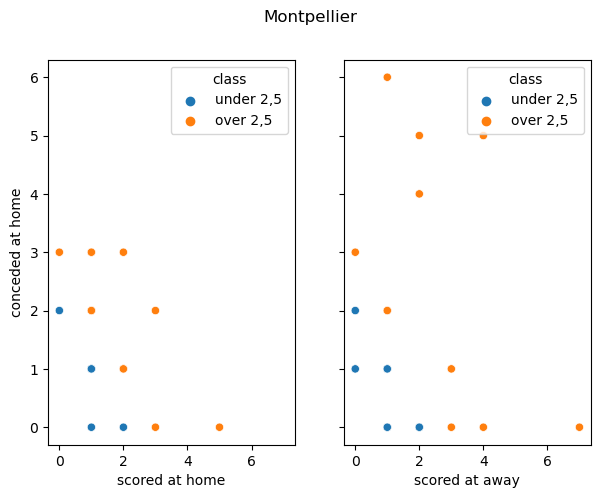

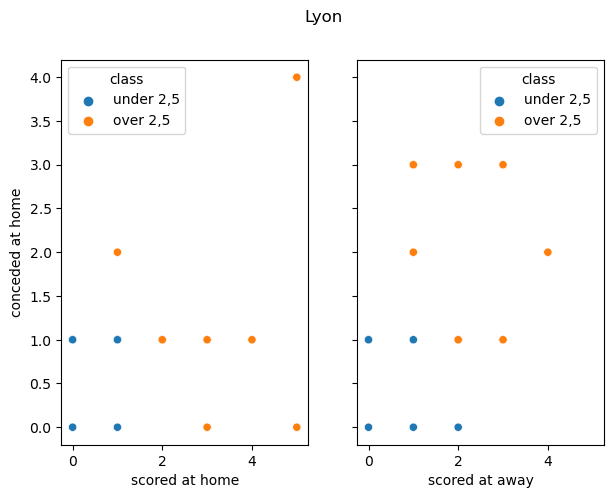

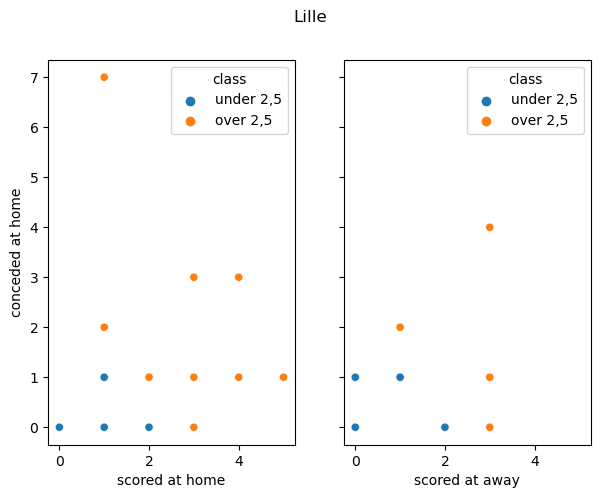

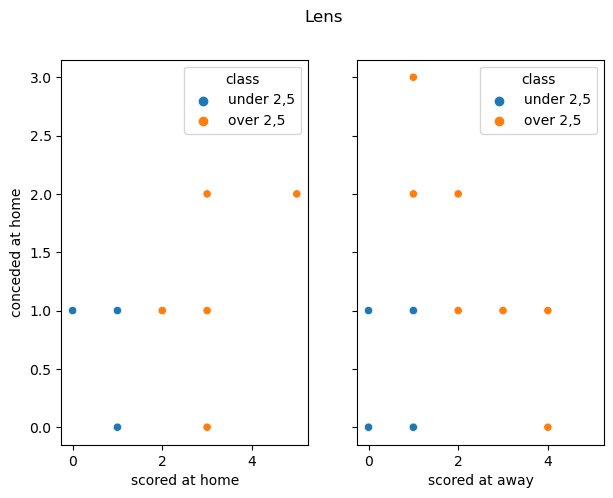

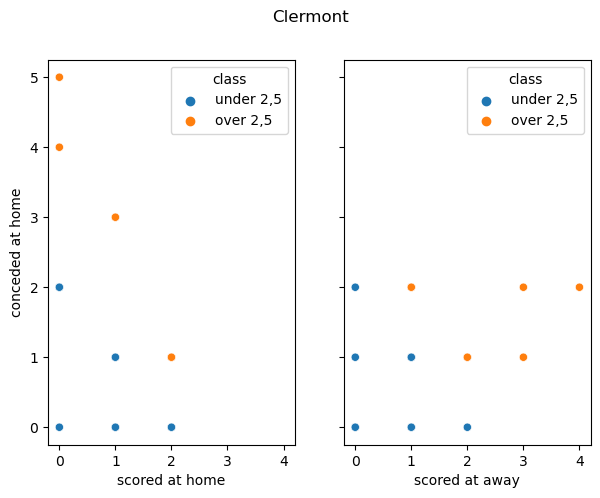

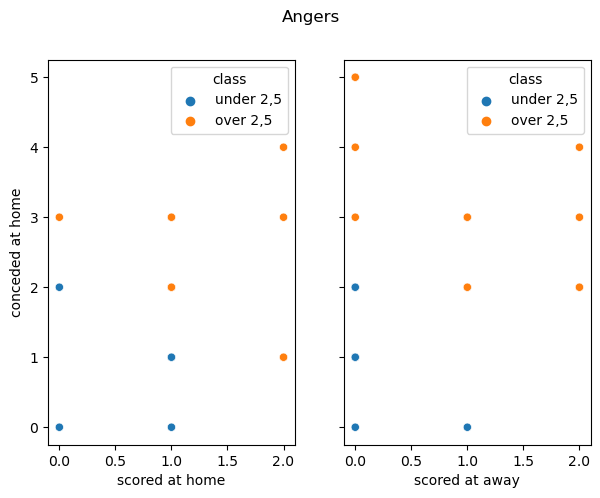

In [20]:
for team in df.home_team.unique():
    rel_ff(team)


### Observation des moyennes des features

In [21]:
at_home = df.groupby('home_team')[['home_team_scored', 'home_team_conceded']].mean()
at_away = df.groupby('away_team')[['away_team_scored', 'away_team_conceded']].mean()
overall = pd.concat([at_home, at_away], axis=1, ignore_index=False)
overall.columns

Index(['home_team_scored', 'home_team_conceded', 'away_team_scored',
       'away_team_conceded'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

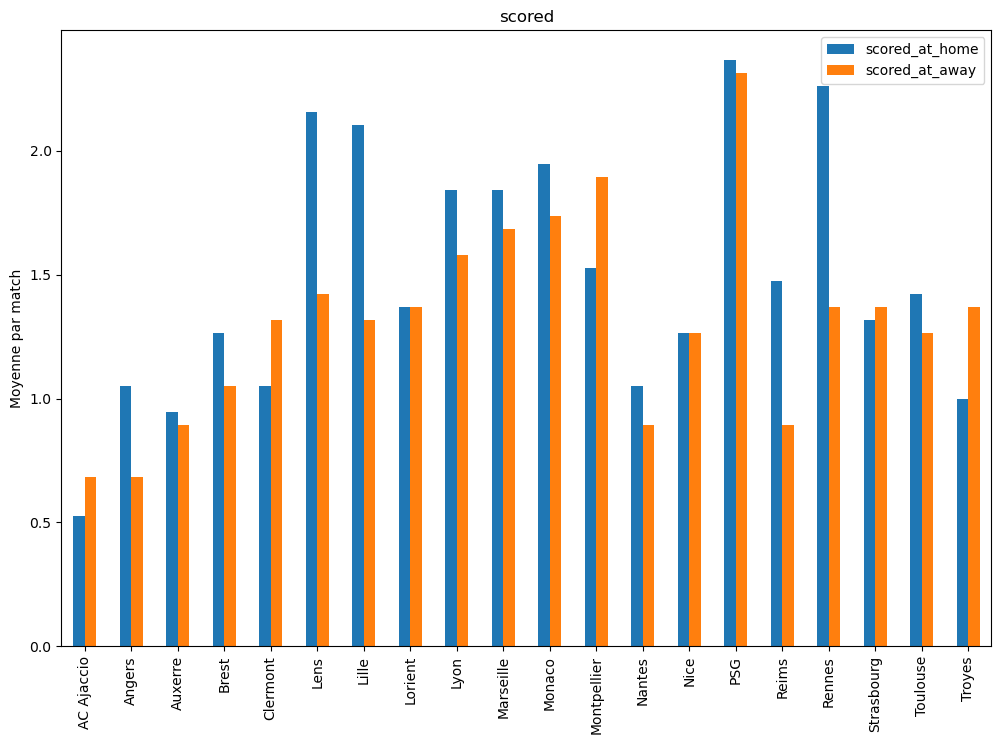

In [22]:
plt.figure()
fig = overall.drop(['home_team_conceded', 'away_team_conceded'],
                   axis=1).rename(columns=({'home_team_scored':'scored_at_home',
                                            'away_team_scored':'scored_at_away'}))
fig.plot.bar(figsize=(12, 8))
plt.ylabel('Moyenne par match')
plt.title('scored')
plt.show()

<Figure size 640x480 with 0 Axes>

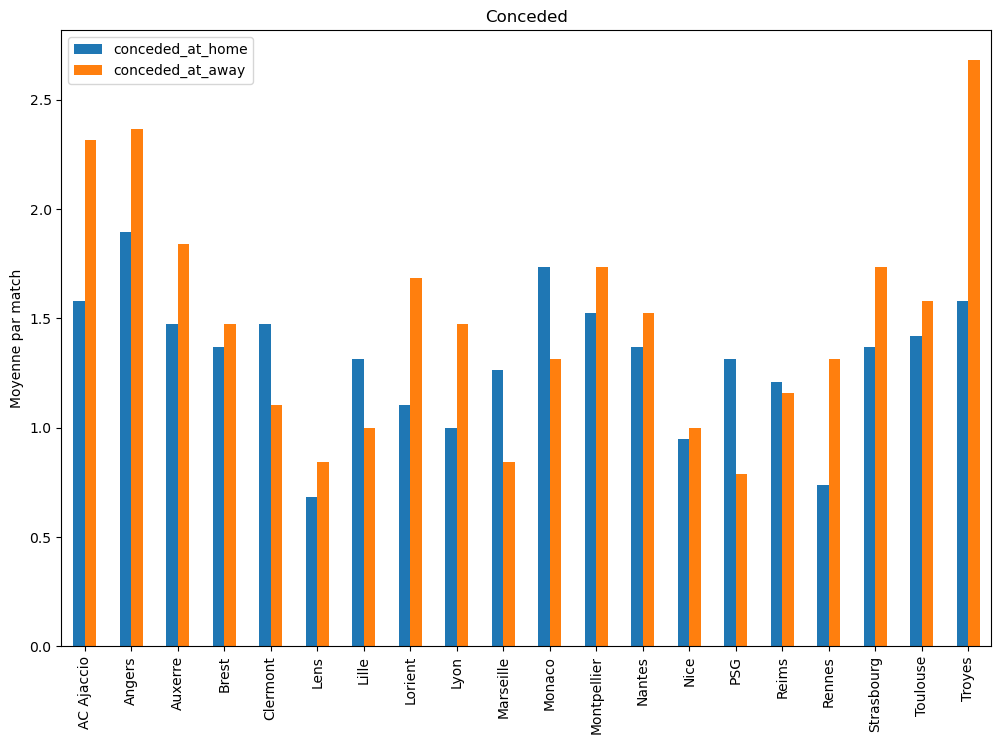

In [23]:
plt.figure()
fig = overall.drop(['home_team_scored', 'away_team_scored'],
                   axis=1).rename(columns=({'home_team_conceded':'conceded_at_home',
                                            'away_team_conceded':'conceded_at_away'}))
fig.plot.bar(figsize=(12, 8))
plt.ylabel('Moyenne par match')
plt.title('Conceded')
plt.show()

### Creation des sous-ensembles 
* strong attack / strong_defense
* weak attack / weak defense
* strong attack / weak defense
* weak attack / strong defense


In [77]:
strg_attack = overall[overall.home_team_scored >= 1.5]
weak_attack = overall[overall.home_team_scored <= 1.5]
strg_defense = overall[overall.home_team_conceded <= 1]
weak_defense = overall[overall.home_team_conceded >= 1.3]

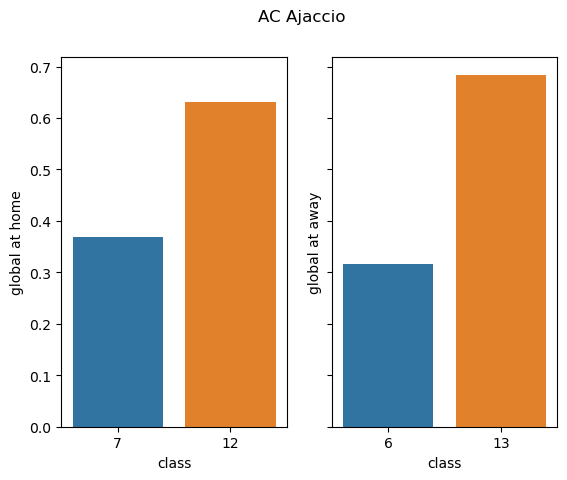

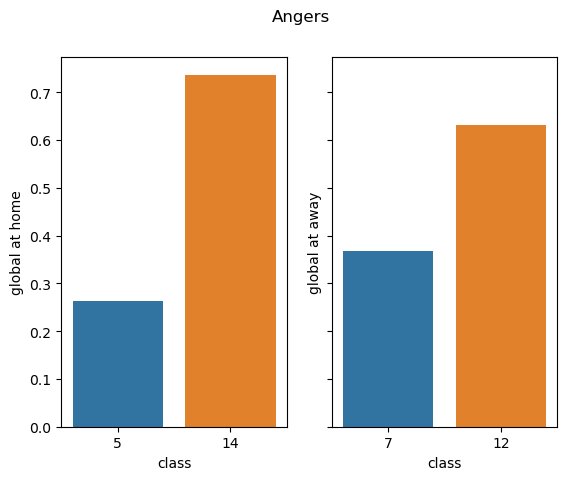

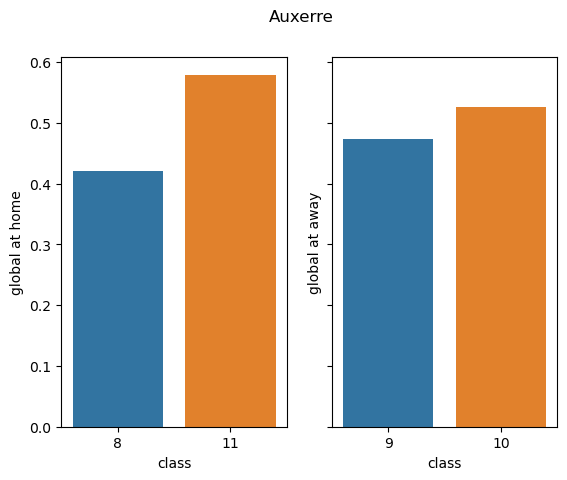

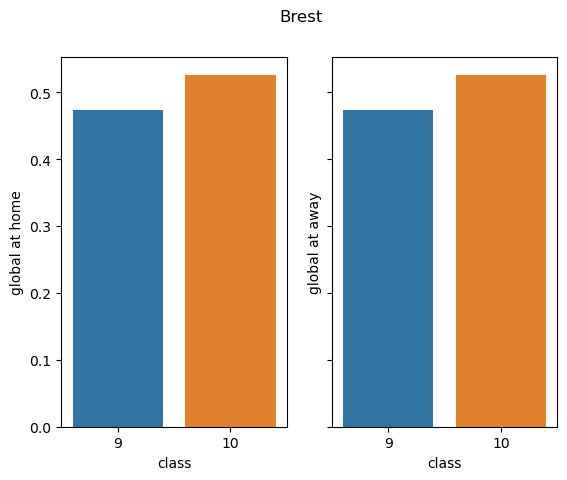

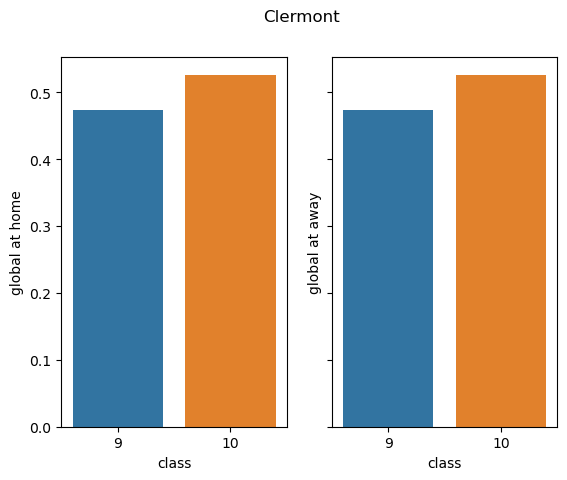

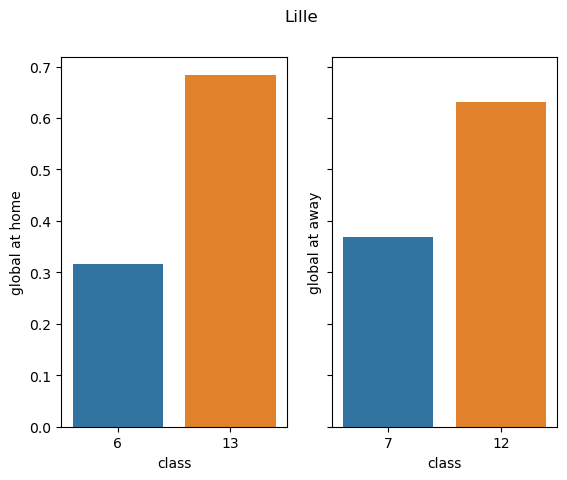

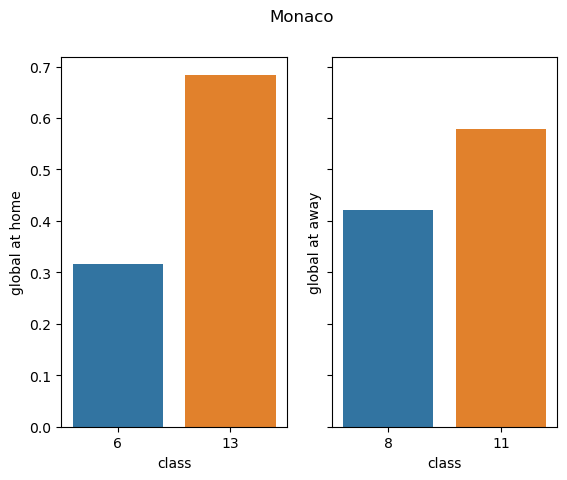

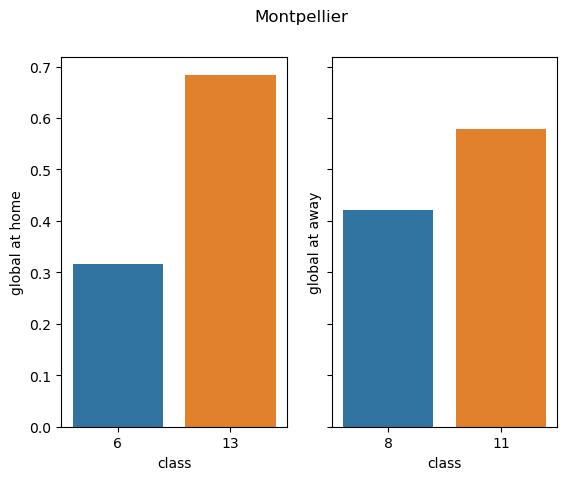

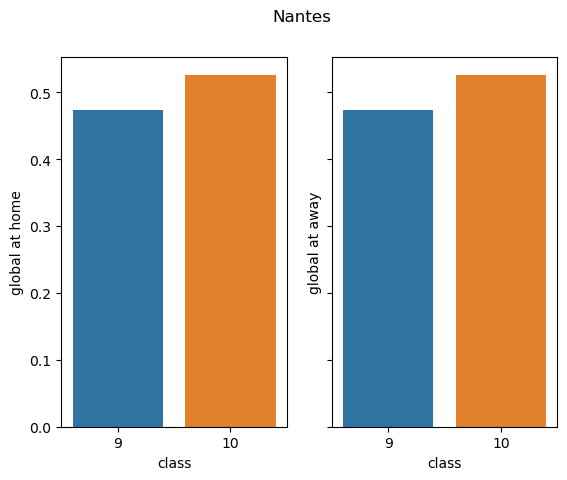

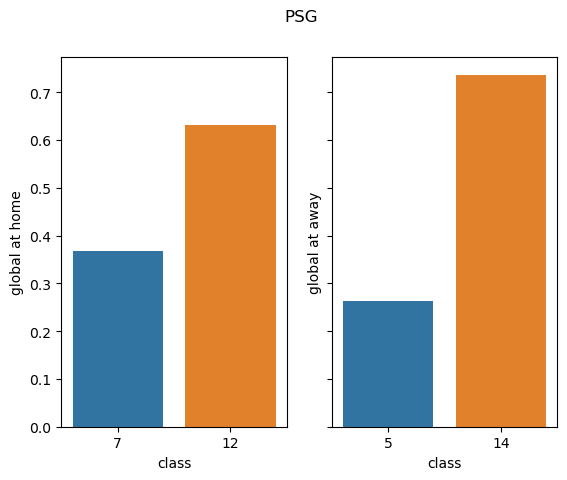

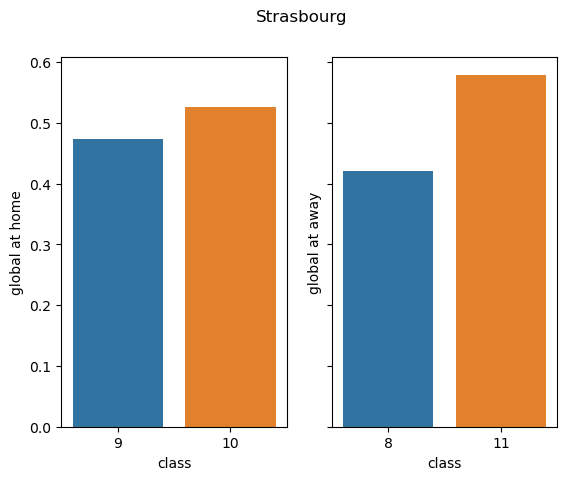

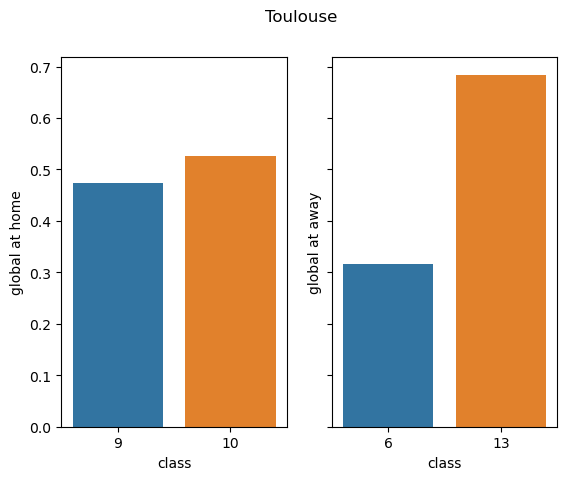

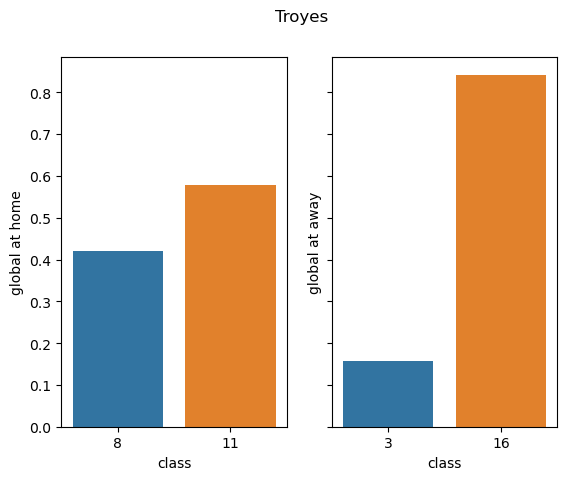

In [112]:
# on vas observer le taux de under / over 
# a domicile et a l'exterieur des groupes
for team in weak_defense.index:
    df_home = df[df['home_team']==team]
    df_away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True)
    sns.barplot(data=df_home, x=df_home['class'].value_counts(), y=df_home['class'].value_counts(normalize=True), ax=axs[0])
    sns.barplot(data=df_away, x=df_away['class'].value_counts(), y=df_away['class'].value_counts(normalize=True), ax=axs[1])
    axs[0].set_ylabel('global at home')
    axs[1].set_ylabel('global at away')
    plt.suptitle(team)
    plt.show()